# Skin Disorder Classification Report

## Introduction
This project focuses on predicting skin disorders by analyzing various clinical features. Using a dataset with columns such as erythema, scaling, definite borders, itching, and specific skin involvements (like scalp and elbows), we aim to develop a model that can accurately distinguish between different skin conditions. By incorporating features like family history, melanin levels, and microscopic characteristics like eosinophils and fibrosis, our model seeks to enhance diagnostic accuracy and support dermatologists in providing more effective treatments.

In this report, we address three key tasks:

#### 1. Data Analysis Report: 
We will perform a comprehensive data analysis on the given dataset, exploring its attributes, distributions, and potential correlations. This analysis will provide insights into the data’s characteristics and guide subsequent modeling efforts.
#### 2. Predictive Model Creation: 
Our goal is to build a machine learning model capable of predicting the various classes of skin diseases. By leveraging clinical and histopathological features, we aim to improve diagnostic accuracy and assist healthcare professionals.
#### 3. Early Identification Suggestions: 
We will offer recommendations to doctors for identifying skin diseases at the earliest stages. Early detection is critical for timely intervention and better patient outcomes.

### Dataset Information
- Attributes: The dataset contains 34 attributes, including 33 linear-valued features and one nominal feature.
- Clinical Evaluation: Initially, patients were evaluated clinically using 12 features.
- Histopathological Evaluation: Skin samples were subsequently analyzed for 22 histopathological features under a microscope.
- Family History: The family history feature takes the value 1 if any of the specified diseases were observed in the    family, and 0 otherwise.
- Age: The age feature represents the patient’s age.
- Degree Scale: Each feature (clinical and histopathological) was assigned a degree in the range of 0 to 3. A value of 0 indicates absence, 3 indicates the highest presence, and 1 or 2 represents intermediate levels.

## Task 1: Data Analysis Report
We will explore the dataset’s statistical properties, visualize feature distributions, and identify any patterns or outliers.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read file into notebook
df = pd.read_csv('dataset_35_dermatology.csv')
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [3]:
# check number of rows and columns
df.shape

(366, 35)

In [4]:
# determine the distribution of our target variable
df['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

###### From the above, we can see that there is an imbalanced class. We will handle this using a resampling technique later on.

In [5]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

###### The age column is an object value instead of being an integer, we will have to convert it.

In [6]:
# Convert 'Age' to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

###### We can see that after converting the Age column to numeric, there are 8 missing values.

In [7]:
# missing values in the Age column
df['Age'].isnull().sum()

8

In [8]:
# let us determine the min and max age
min_age = df['Age'].min()
max_age = df['Age'].max()

print('Minimum Age: ', min_age)
print('Maximum Age: ', max_age)

Minimum Age:  0.0
Maximum Age:  75.0


In [9]:
df[df['Age'] == 0]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
119,1,1,1,1,1,0,0,0,2,2,...,0,0,0,0,0,0,0,2,0.0,1


###### We can see that we have a one row with a minimum age of 0, which could be an error or it was a placeholder for an age not known. In reality we can only have age in months(for babies), or in years. We will replace age 0, alonside the missing values, with the median of the age.

In [10]:
# Replace age zero with median
df['Age'].replace(0, df['Age'].mean(), inplace=True)

In [11]:
# replace missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [12]:
# check to see if values are complete
df.info()
df['Age'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

count    366.000000
mean      36.377858
std       15.036379
min        7.000000
25%       25.000000
50%       35.500000
75%       48.000000
max       75.000000
Name: Age, dtype: float64

- ###### The youngest age is 7 years while the oldest age is 75 years.
- ###### 75% of the ages are below 48 years.
- ###### 50% of the ages are below 35.5 years.
- ###### 25% of the ages are below 25 years.
- ###### The average age is approximately 36.38 years.

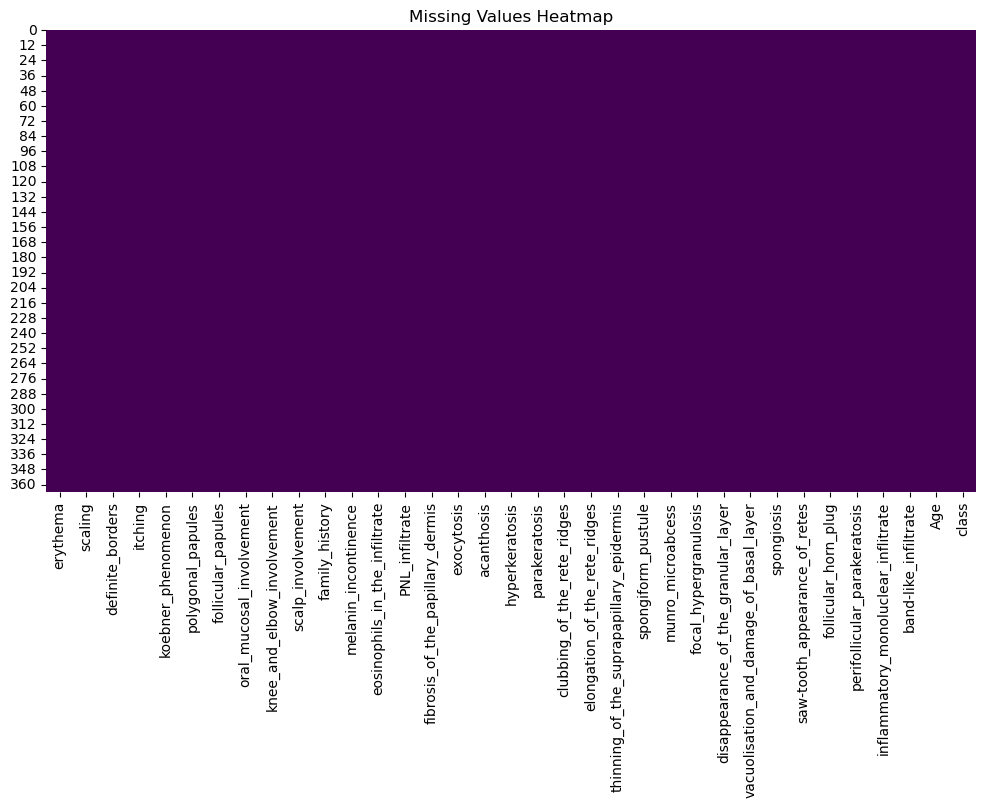

In [13]:
# We can visualize to make sure there are no missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

###### The dataset has been successfully loaded. The 'Age' column has been converted to numeric and missing values replaced. Now, let's proceed with other exploratory data analysis and visualizations.

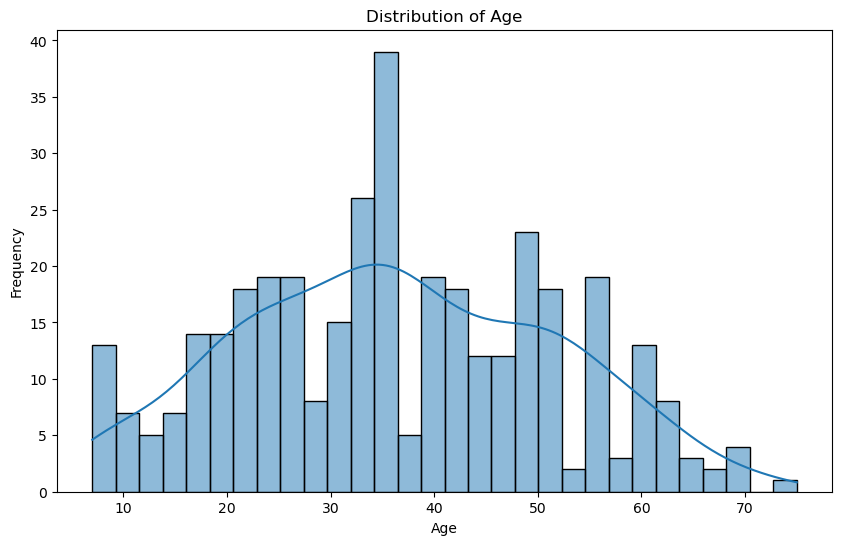

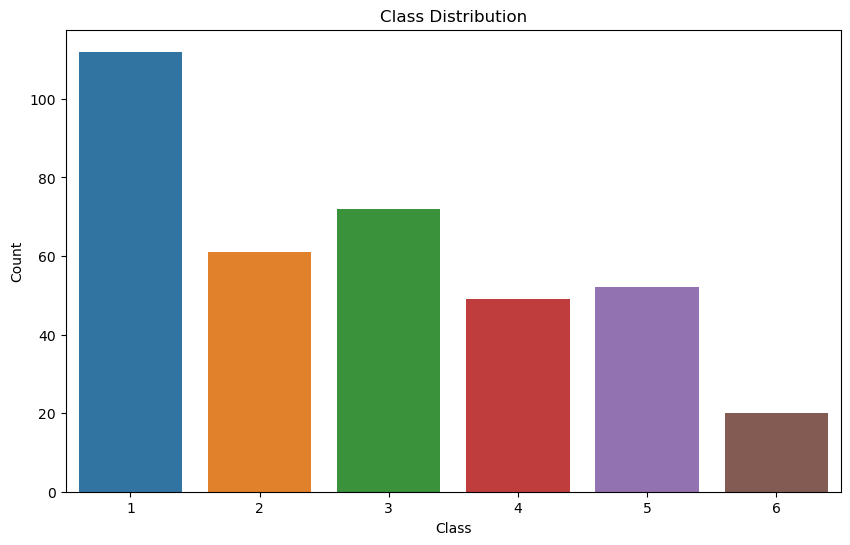

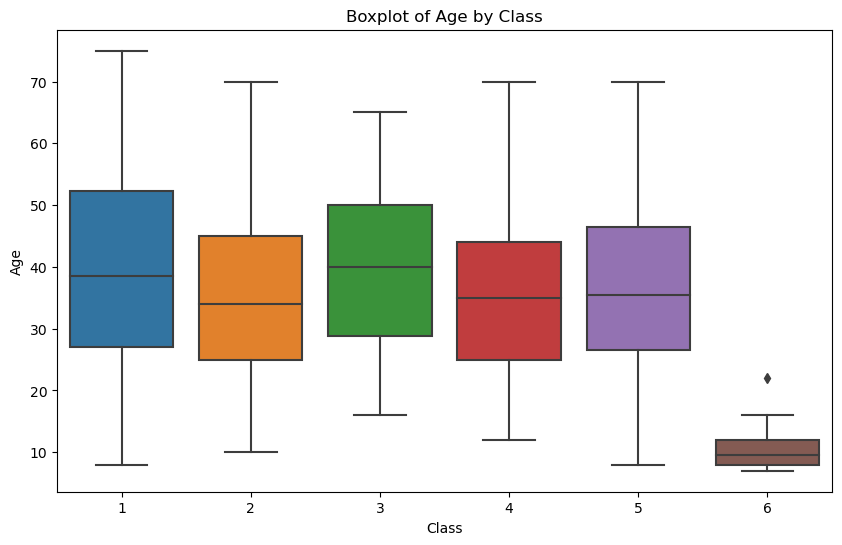

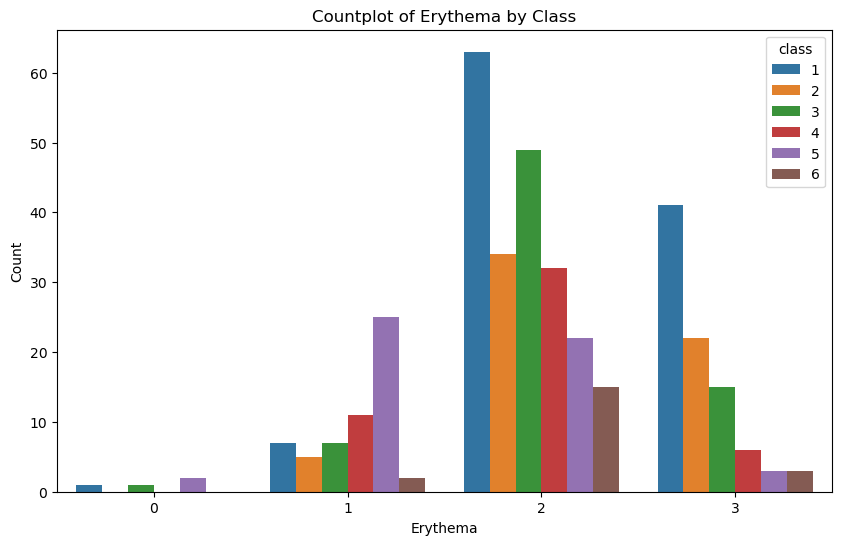

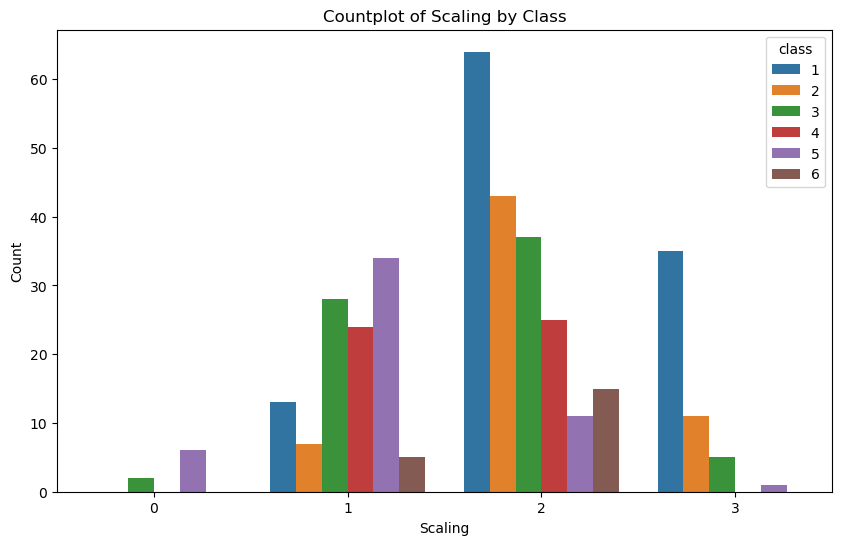

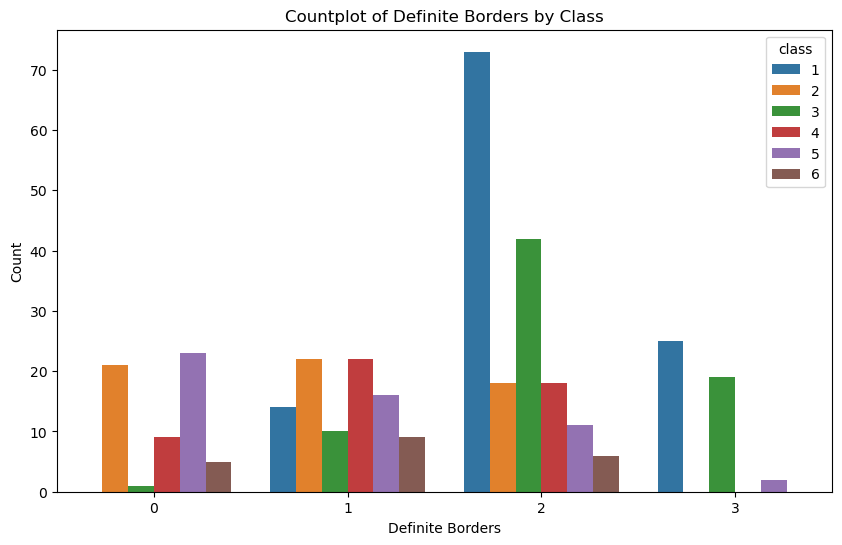

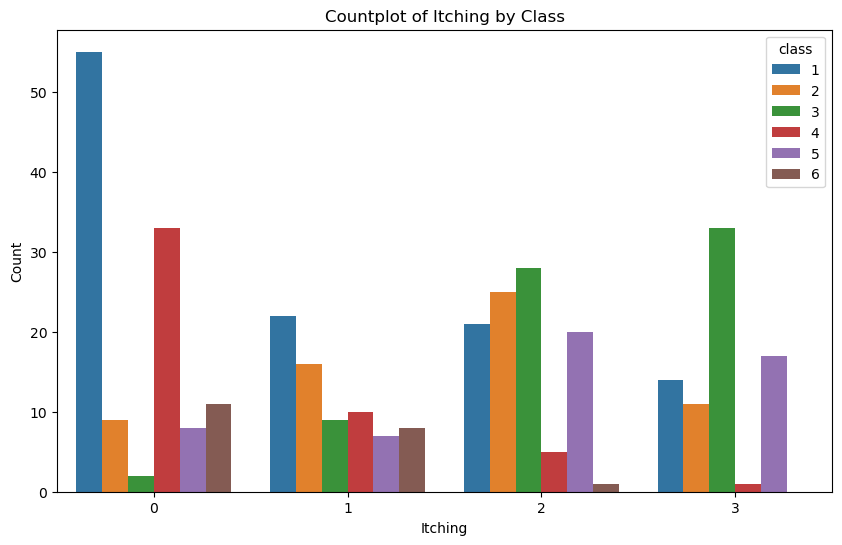

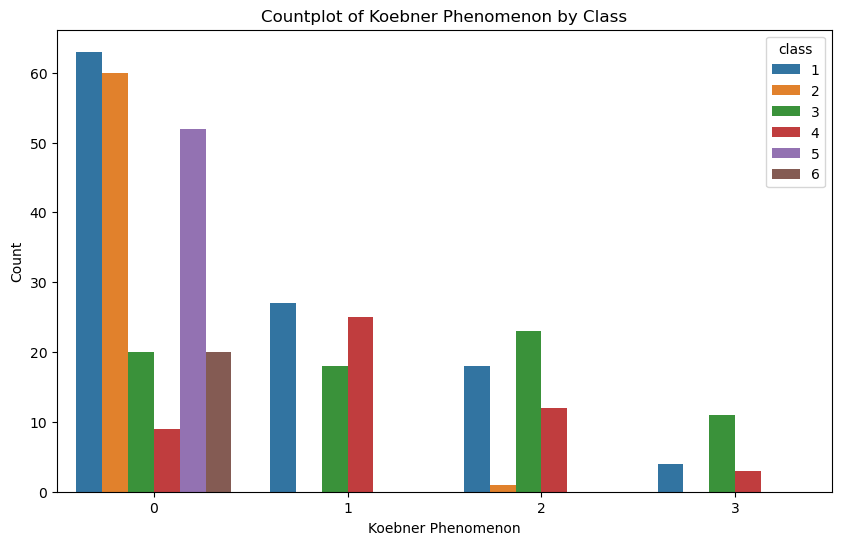

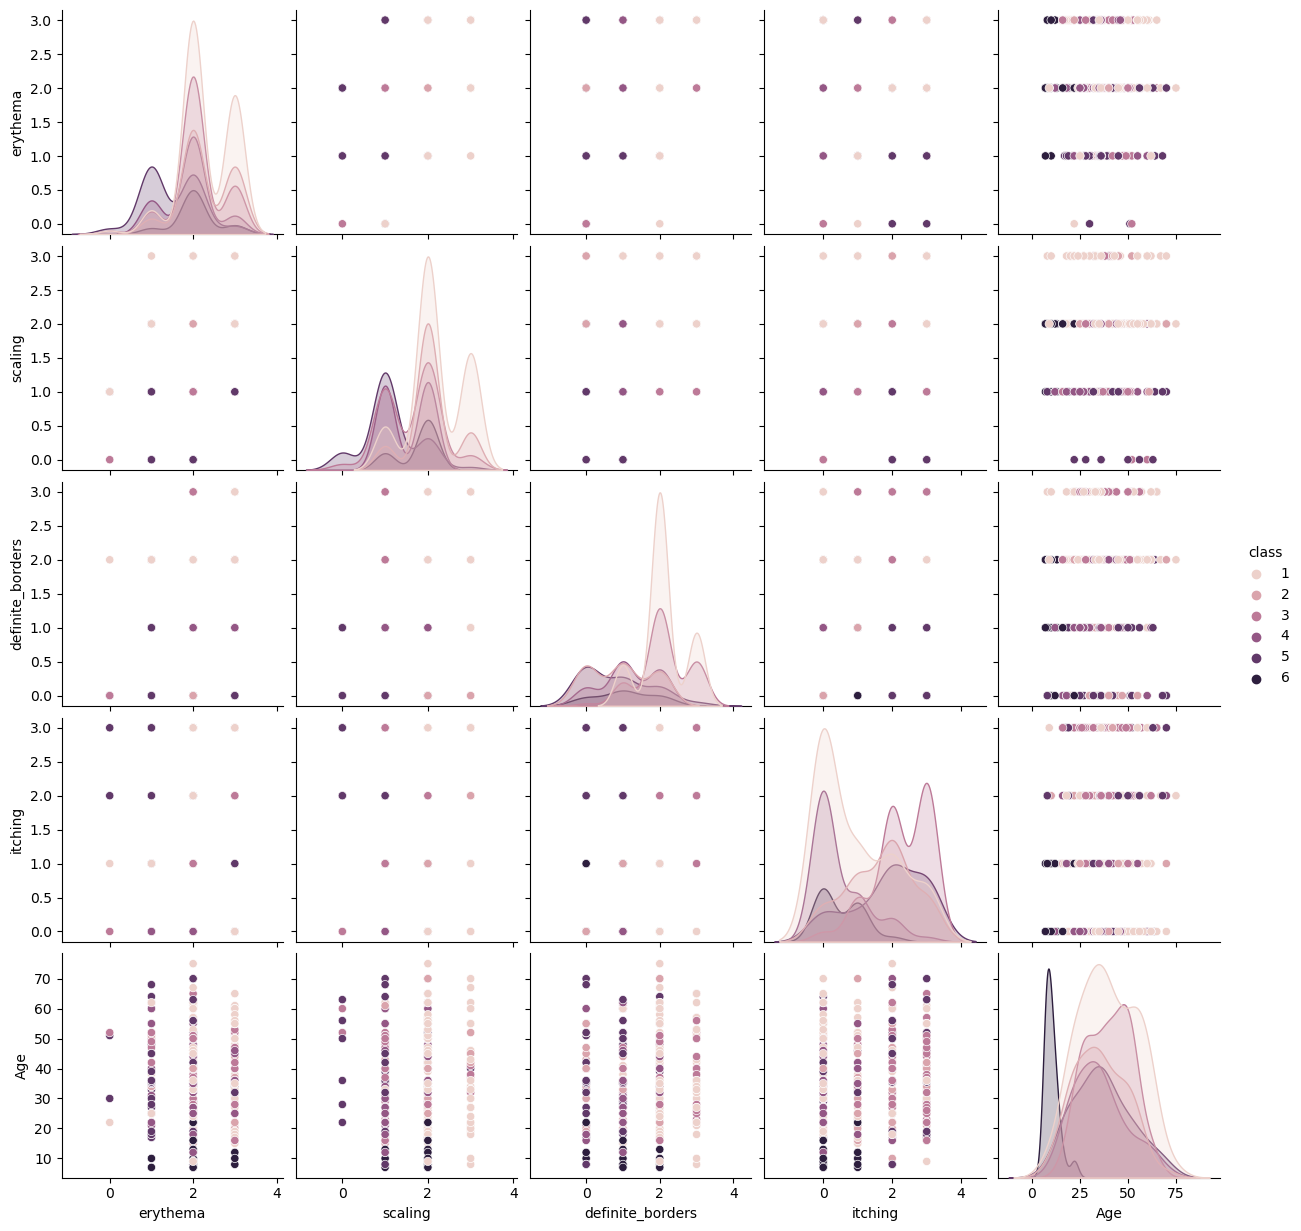

Visualizations created.


In [14]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 3. Boxplot of Age by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Boxplot of Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

# 4. Countplot of Erythema by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='erythema', hue='class', data=df)
plt.title('Countplot of Erythema by Class')
plt.xlabel('Erythema')
plt.ylabel('Count')
plt.show()

# 5. Countplot of Scaling by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='scaling', hue='class', data=df)
plt.title('Countplot of Scaling by Class')
plt.xlabel('Scaling')
plt.ylabel('Count')
plt.show()

# 6. Countplot of Definite Borders by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='definite_borders', hue='class', data=df)
plt.title('Countplot of Definite Borders by Class')
plt.xlabel('Definite Borders')
plt.ylabel('Count')
plt.show()

# 7. Countplot of Itching by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='itching', hue='class', data=df)
plt.title('Countplot of Itching by Class')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.show()

# 8. Countplot of Koebner Phenomenon by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='koebner_phenomenon', hue='class', data=df)
plt.title('Countplot of Koebner Phenomenon by Class')
plt.xlabel('Koebner Phenomenon')
plt.ylabel('Count')
plt.show()

# 9. Pairplot of Selected Features
selected_features = ['erythema', 'scaling', 'definite_borders', 'itching', 'Age', 'class']
sns.pairplot(df[selected_features], hue='class')
plt.show()

print('Visualizations created.')

In [15]:
import warnings
warnings.filterwarnings(action = 'ignore')

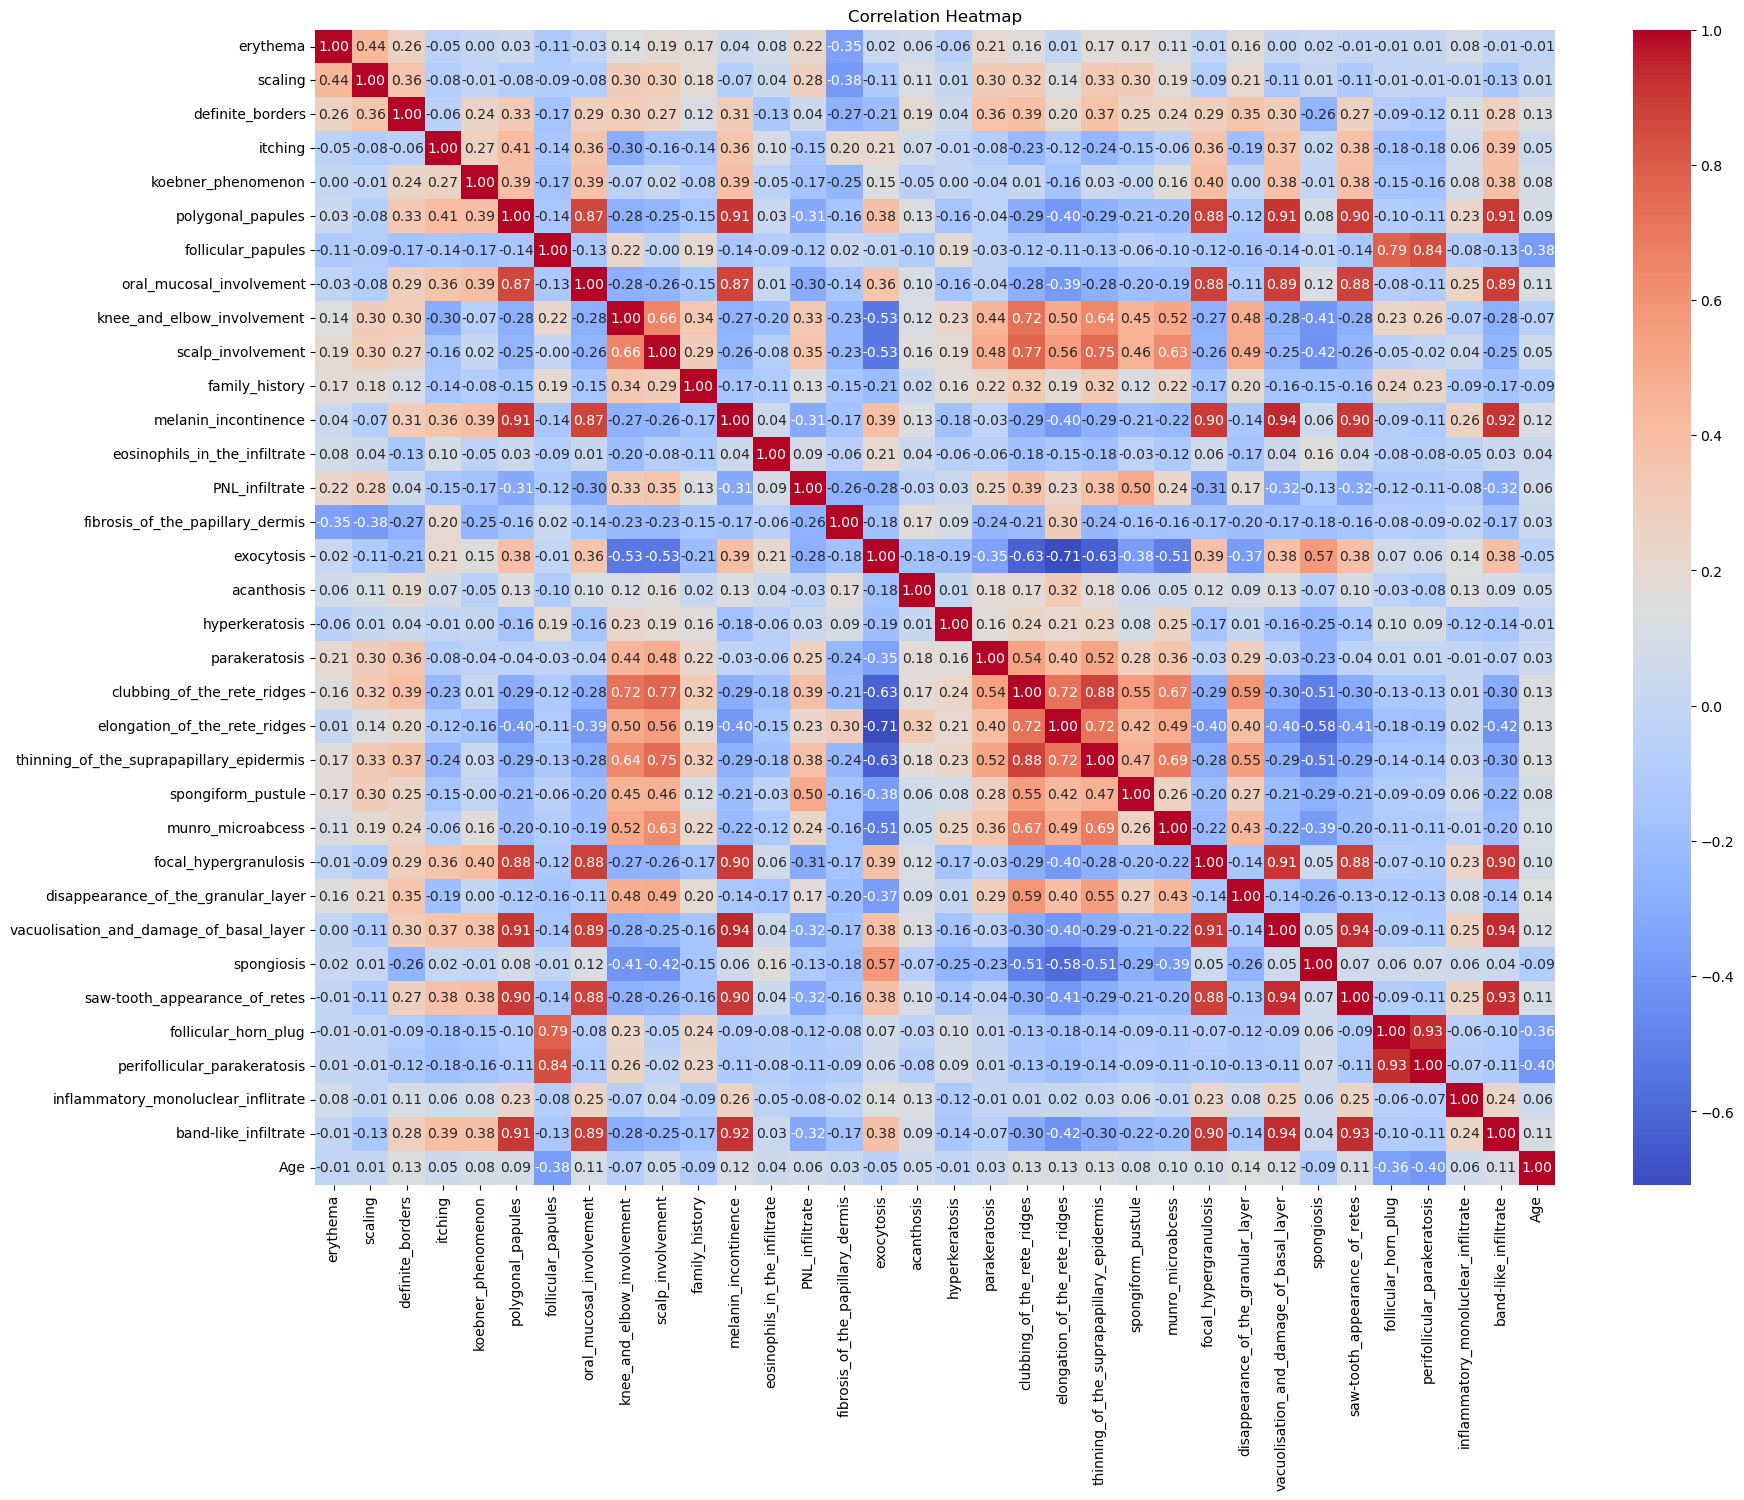

Correlation heatmap created.


In [16]:
# Exclude 'class' column from correlation calculation
numeric_df = df.drop(columns=['class'])

# Re-run the correlation heatmap
plt.figure(figsize=(20, 15))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print('Correlation heatmap created.')

###### Looking into the box plot of Age by Class, we saw earlier that there was an outlier on class 6.
###### Take a look at the box plot below again.

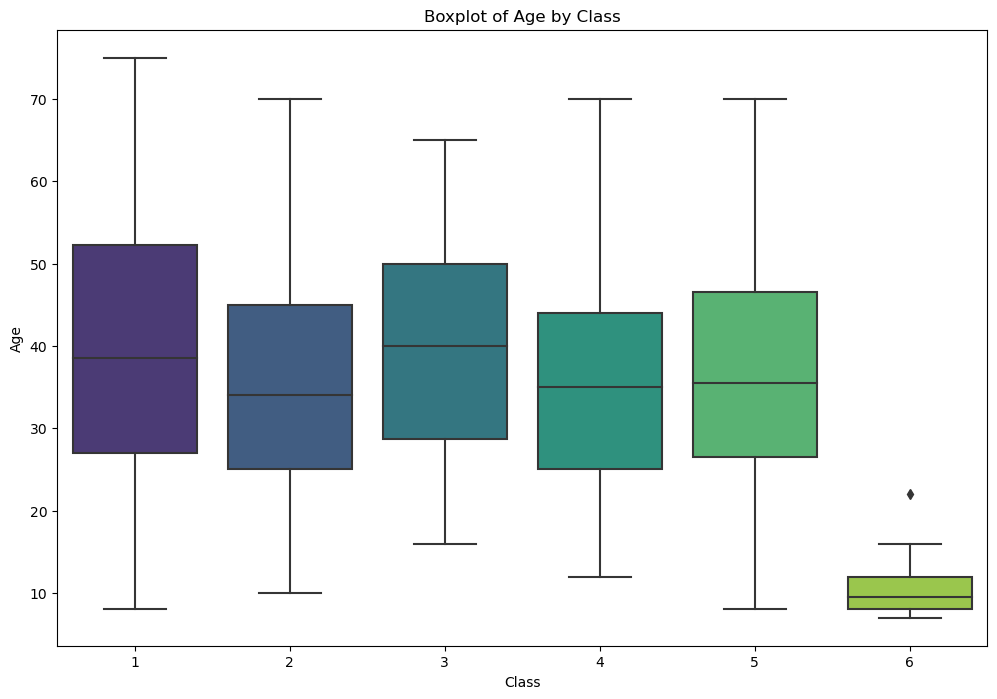

Boxplot of Age by Class created.


In [17]:
# Boxplot of Age by Class
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='class', y='Age', palette='viridis')
plt.title('Boxplot of Age by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

print('Boxplot of Age by Class created.')

###### Let us determine what causes the outlier in class 6.

In [18]:
# get the interquantile range
Q1 = df[df['class'] == 6]['Age'].quantile(0.25)
Q3 = df[df['class'] == 6]['Age'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
outlier_cond = (df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))
outliers = df[df['class'] == 6][outlier_cond]

# Create a DataFrame from the outliers
outliers_df = pd.DataFrame(outliers)

outliers_df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
347,2,2,0,1,0,0,2,0,2,0,...,0,0,1,0,2,2,2,0,22.0,6


###### We have determined the exact age that caused the oulier in class 6. We can see that those who have the class 6 skin disorder are typically toddlers and teenagers. So having a young adult of age 22 in that category seems odd, hence the outlier. It may be a rare case, but we can still further consult with the dermatologist to determine how possible this is.

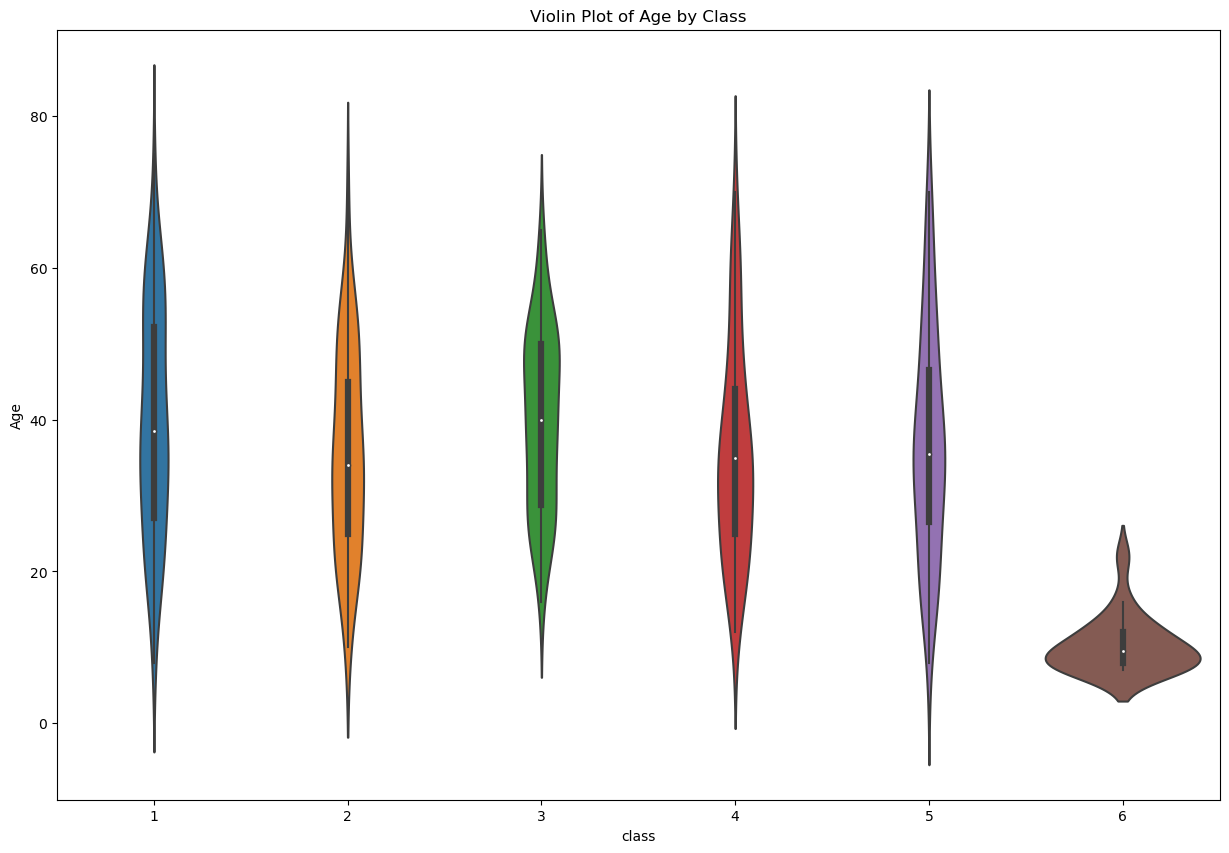

In [20]:
# Create a violin plot for the dataset
plt.figure(figsize=(15, 10))
sns.violinplot(x='class', y='Age', data=df)
plt.title('Violin Plot of Age by Class')
plt.show()

###### The violin plot shows the distribution of Age for each class. It provides insights into the spread and density of Age within each class.

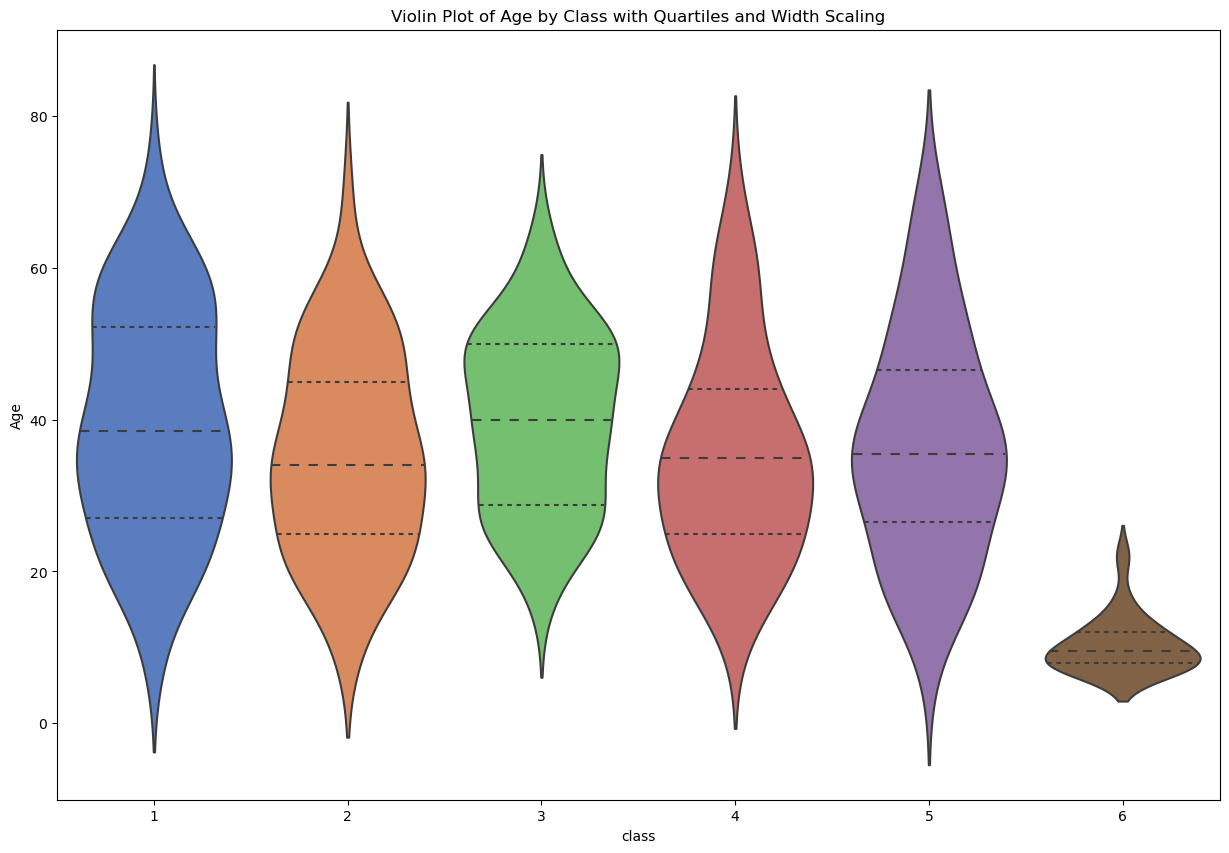

In [21]:
# Create a violin plot with additional features
plt.figure(figsize=(15, 10))
sns.violinplot(x='class', y='Age', data=df, inner='quartile', scale='width', palette='muted')
plt.title('Violin Plot of Age by Class with Quartiles and Width Scaling')
plt.show()

###### This violin plot includes quartiles and width scaling, providing a more detailed view of the distribution of Age within each class.

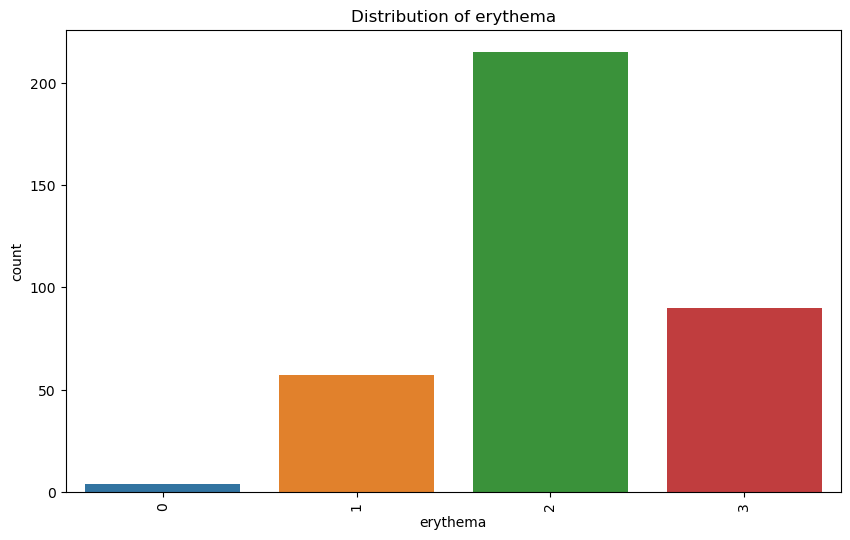

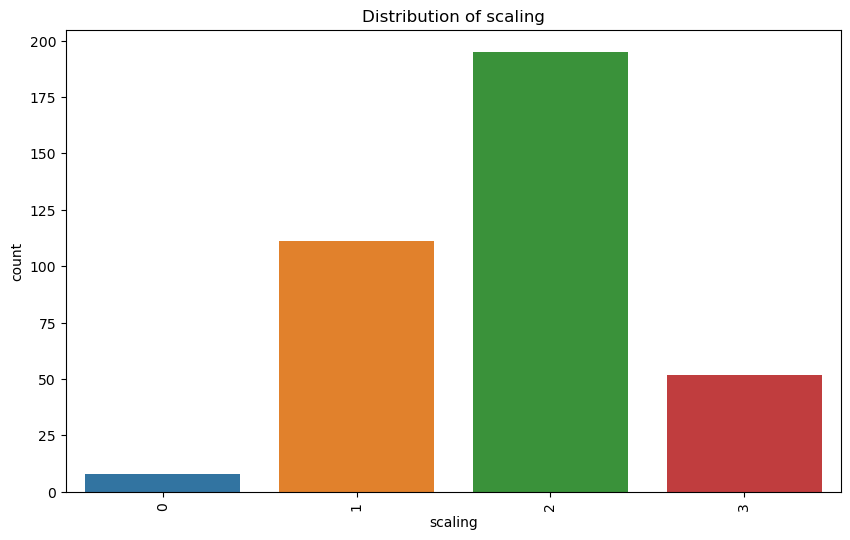

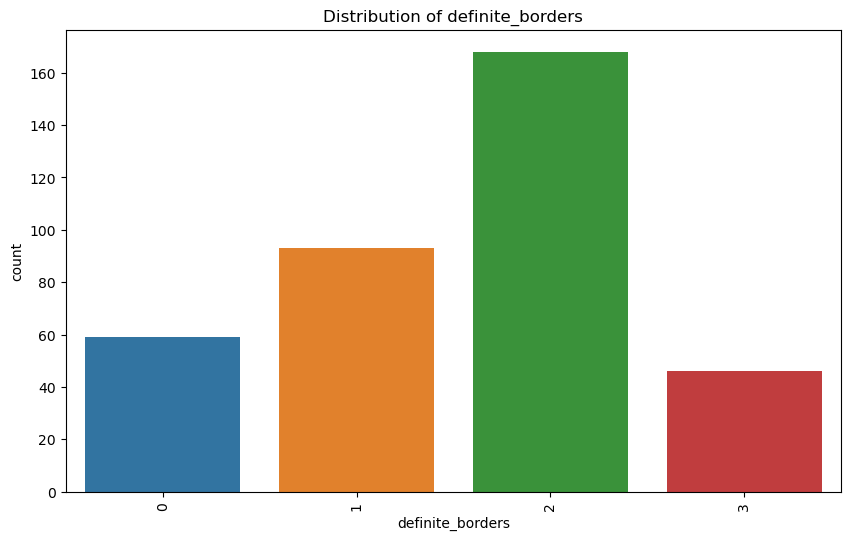

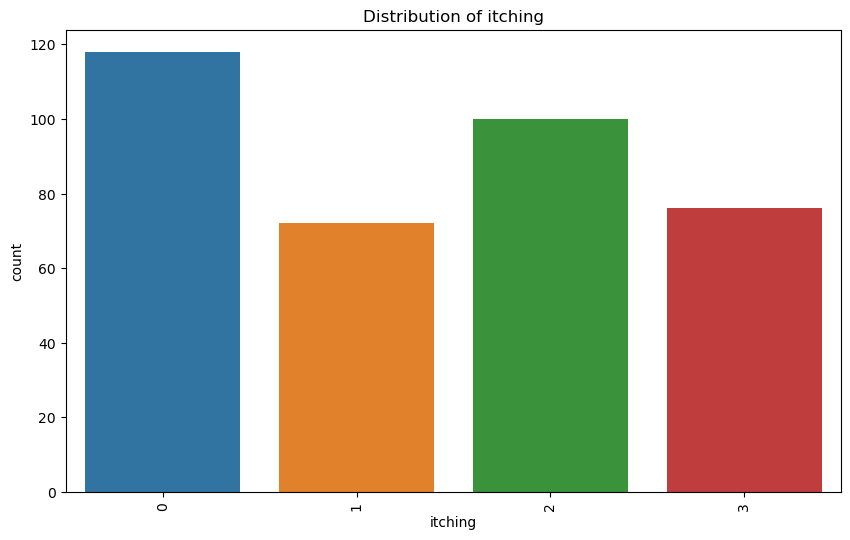

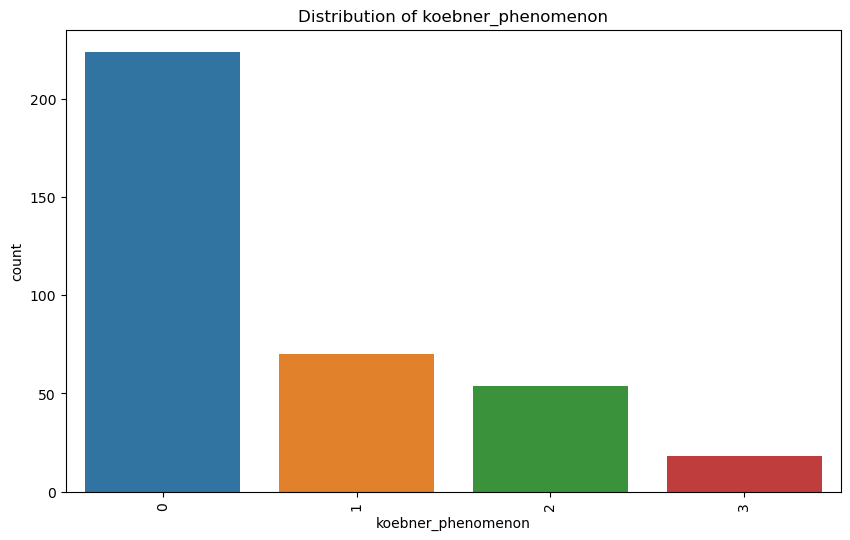

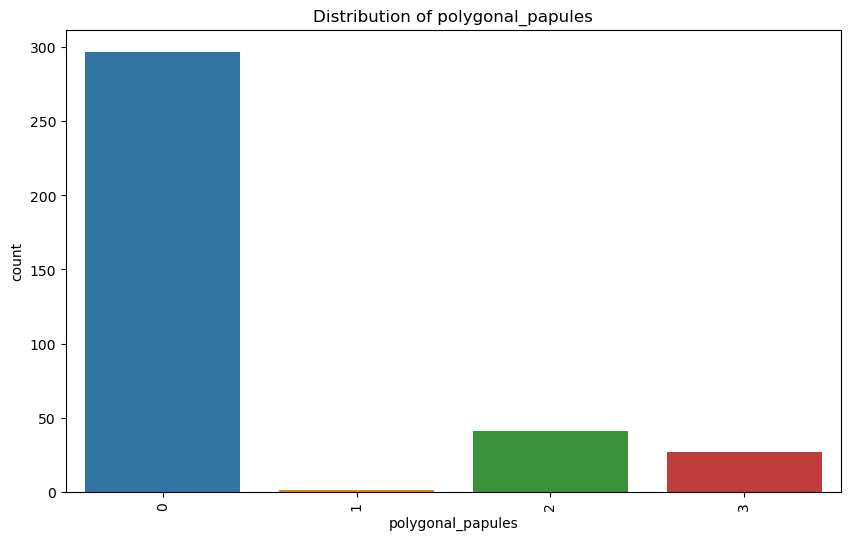

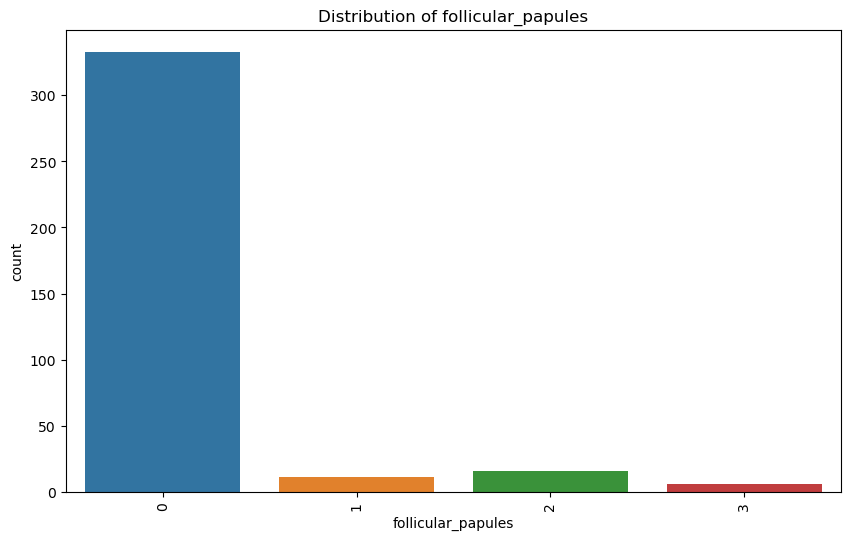

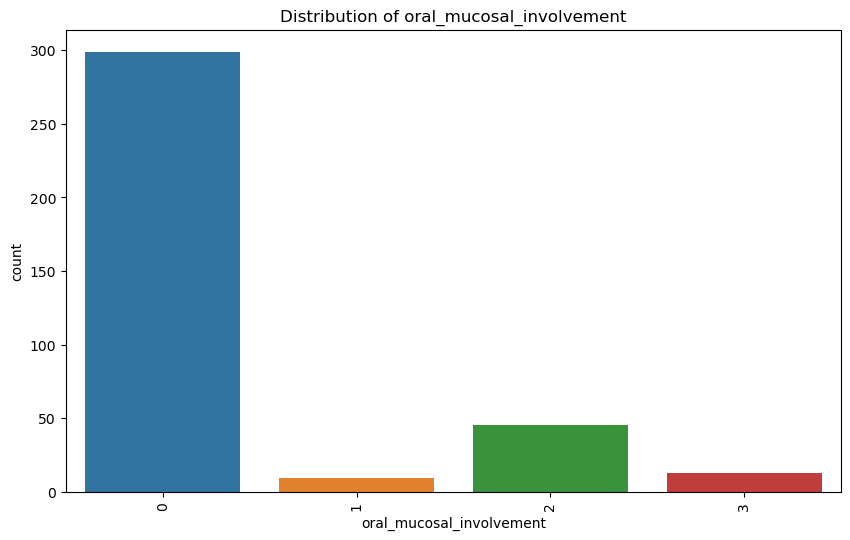

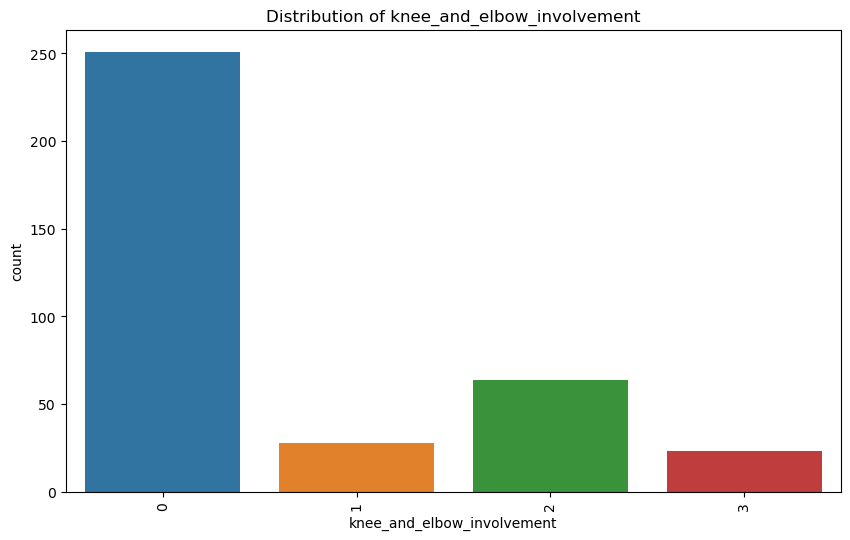

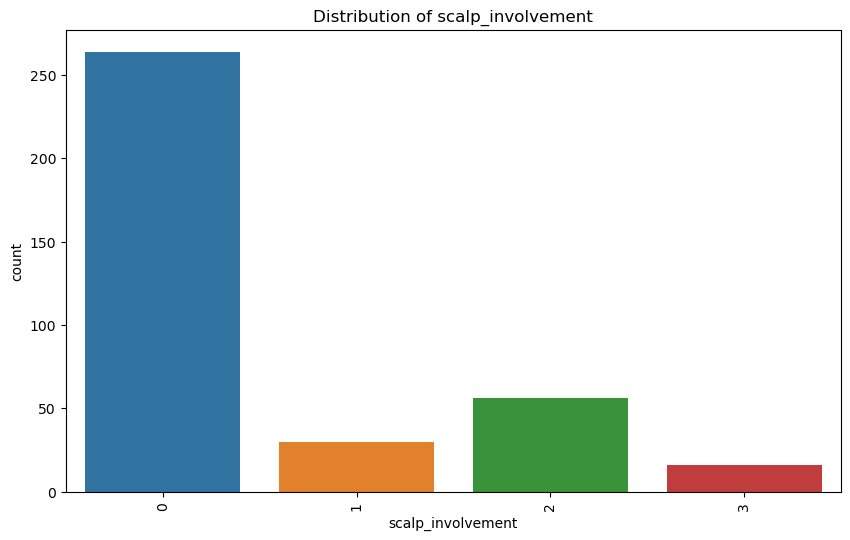

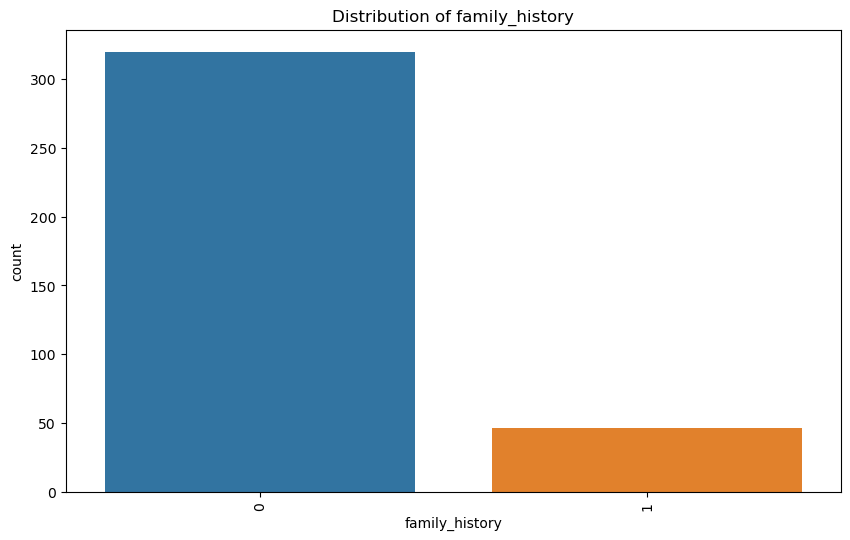

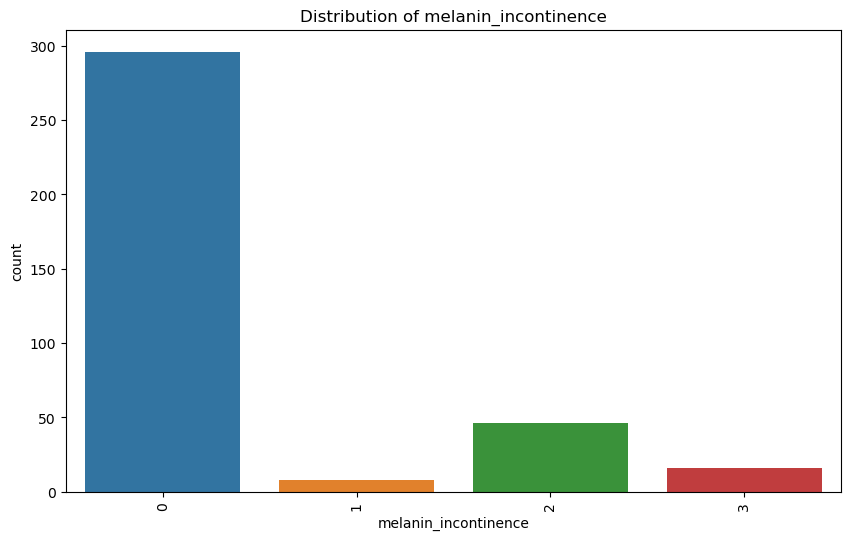

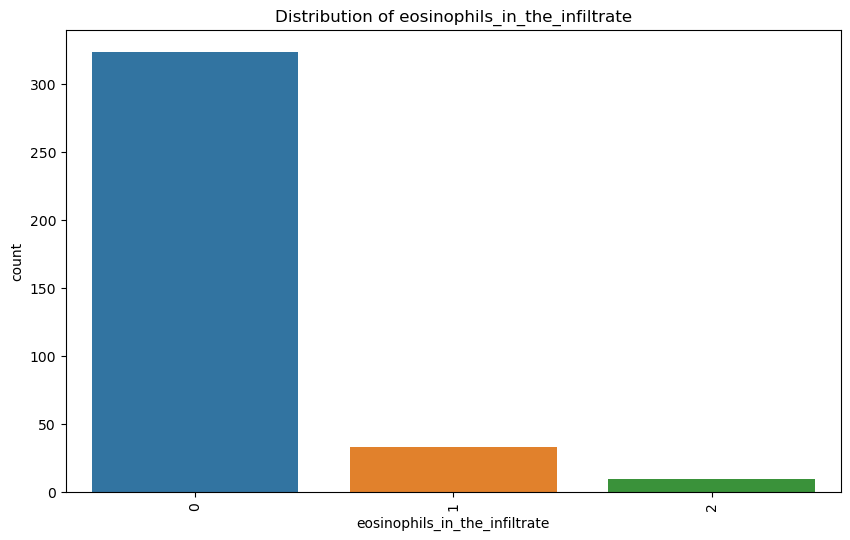

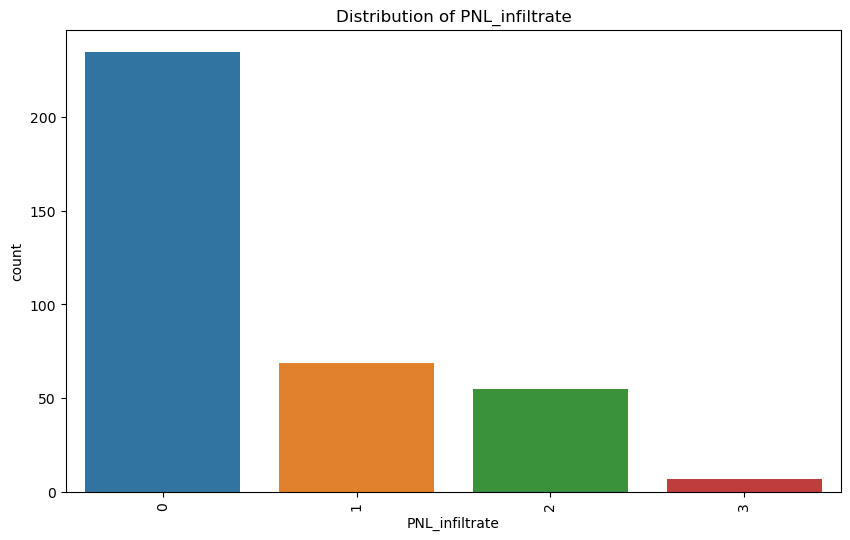

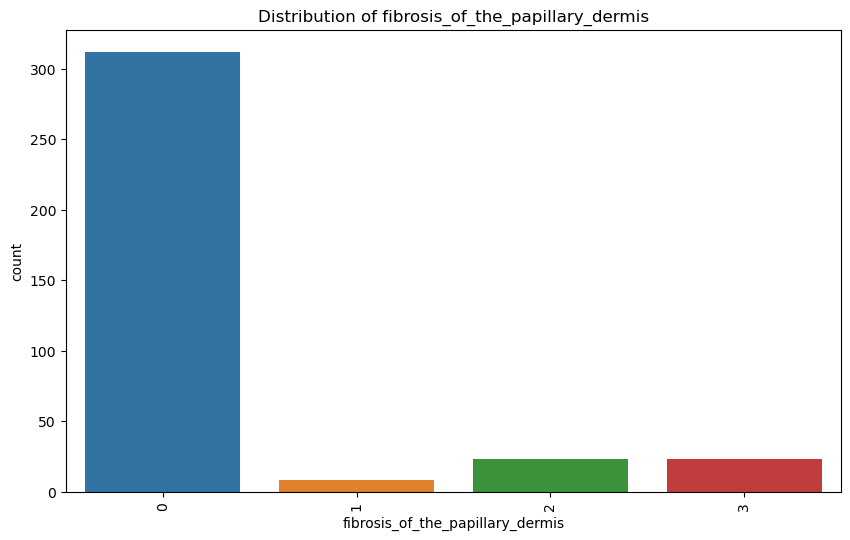

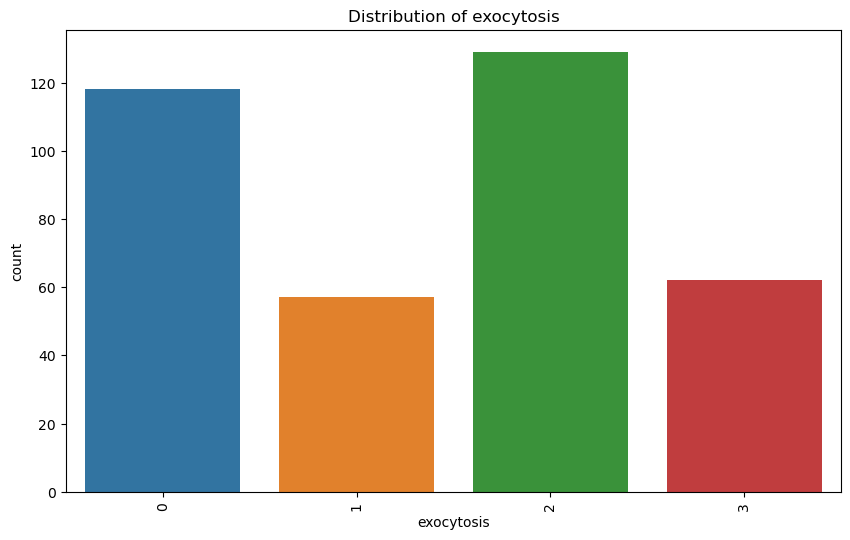

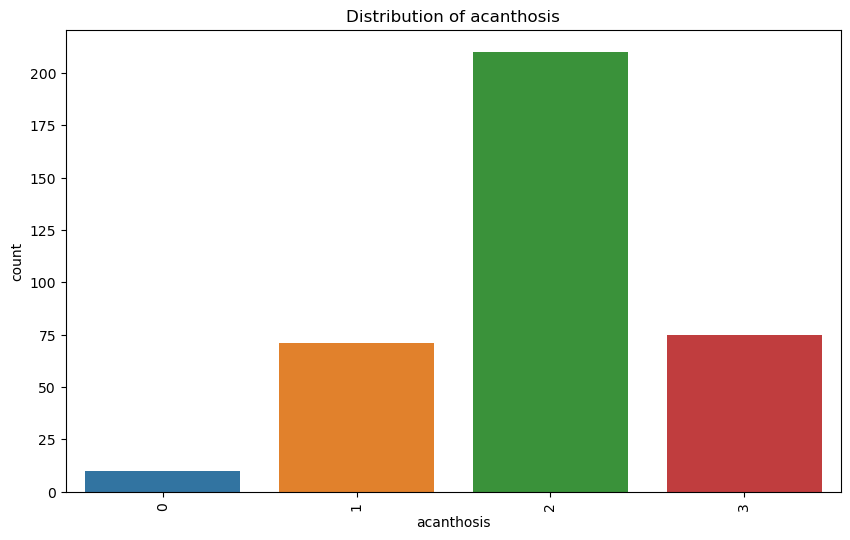

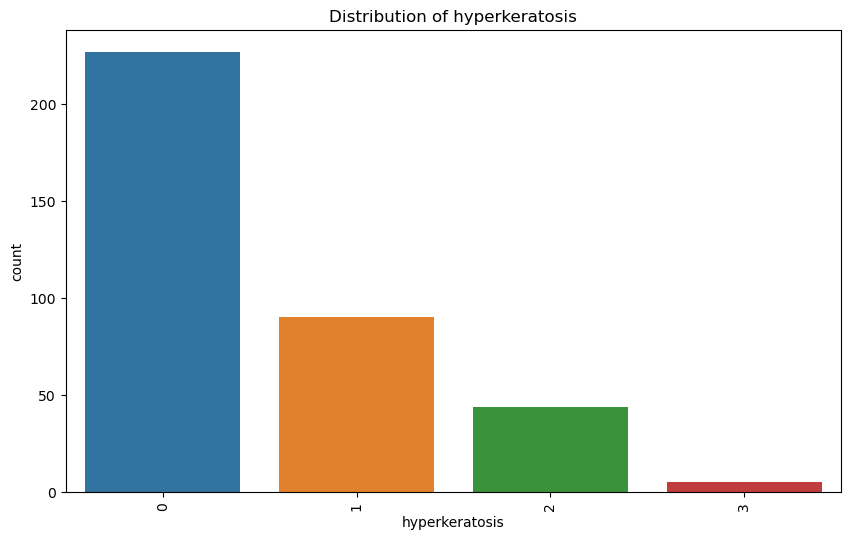

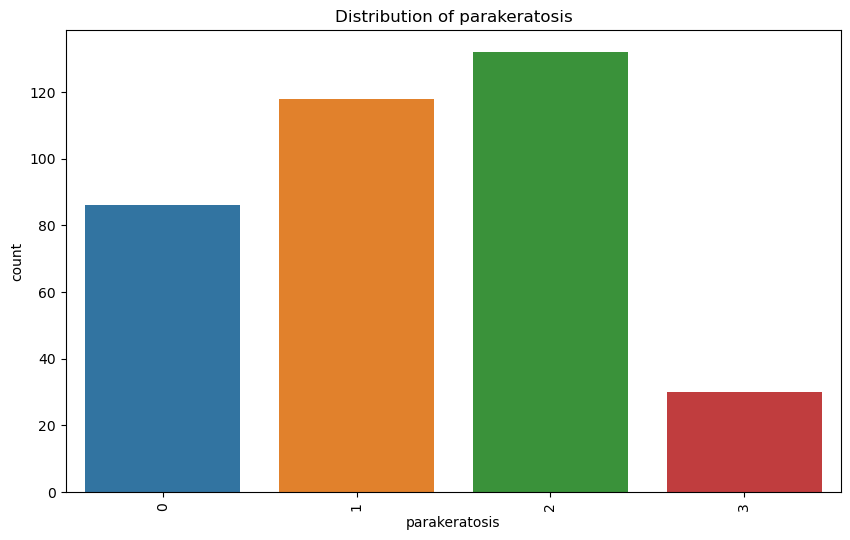

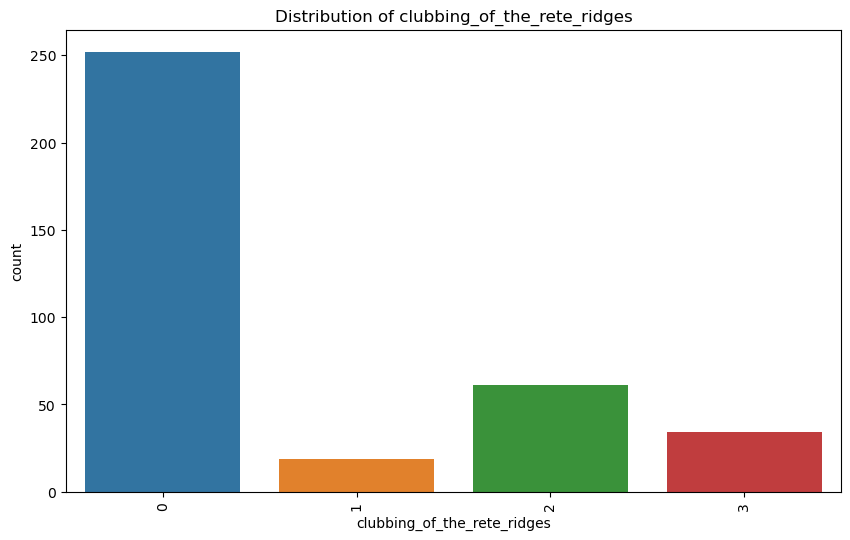

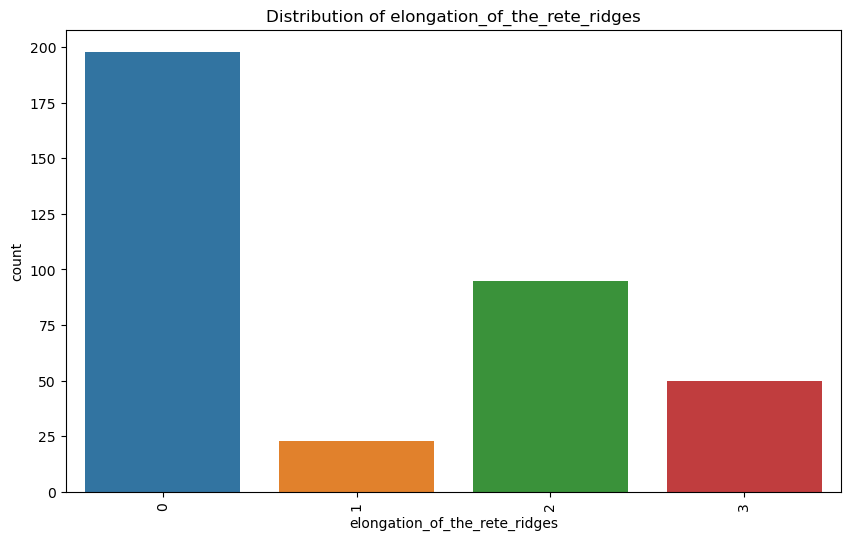

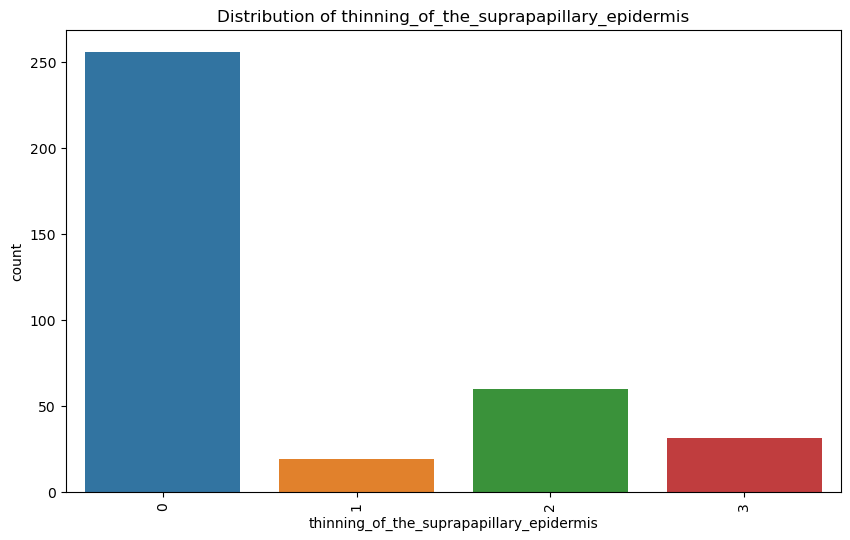

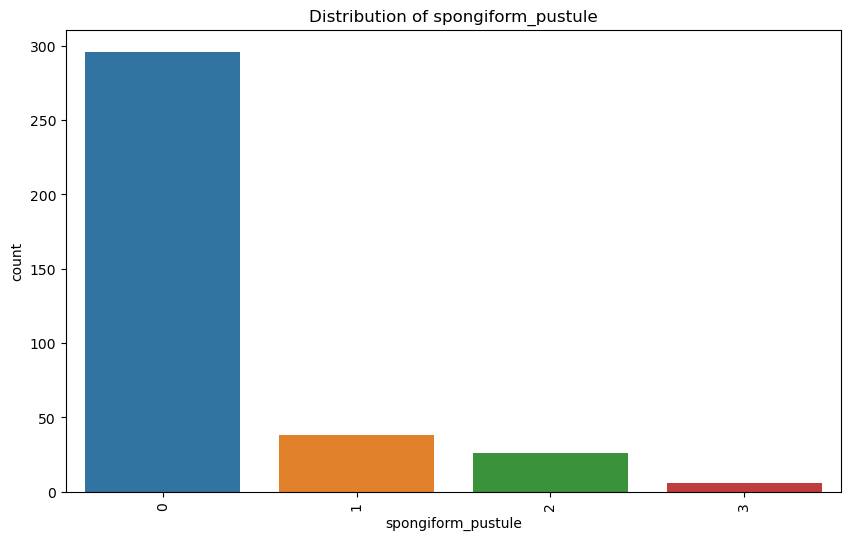

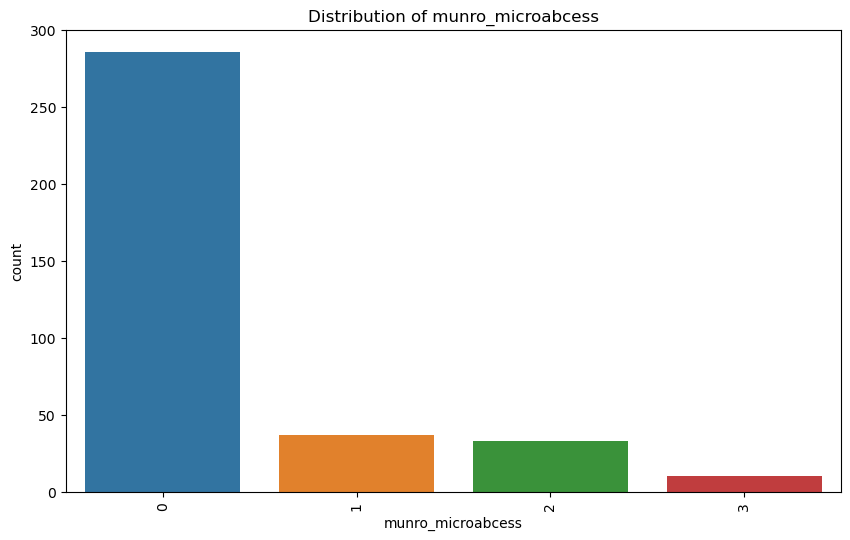

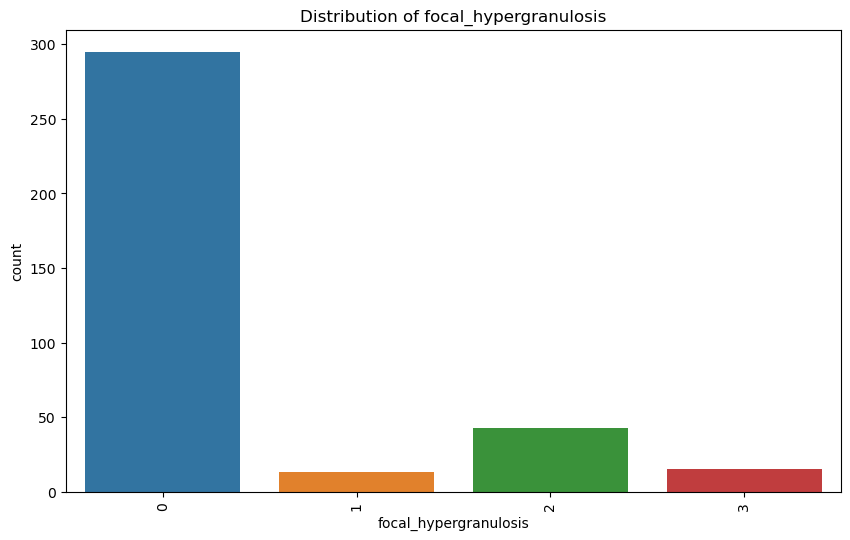

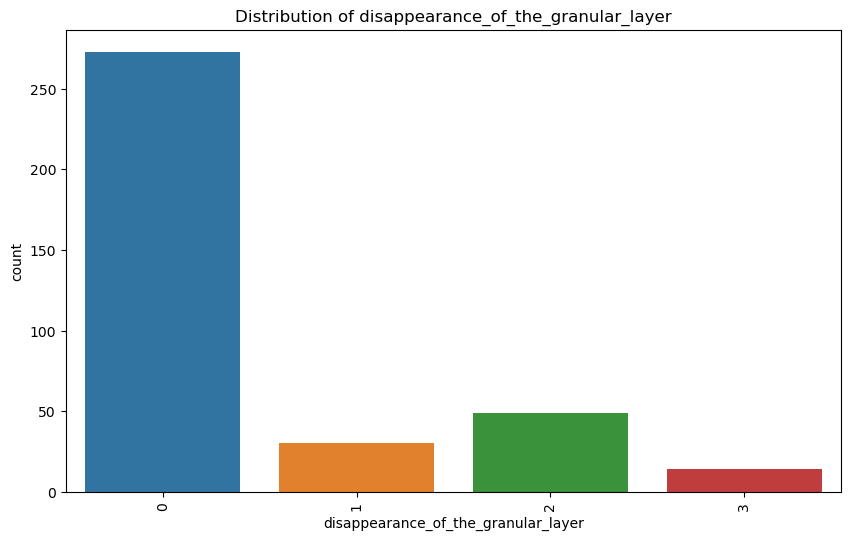

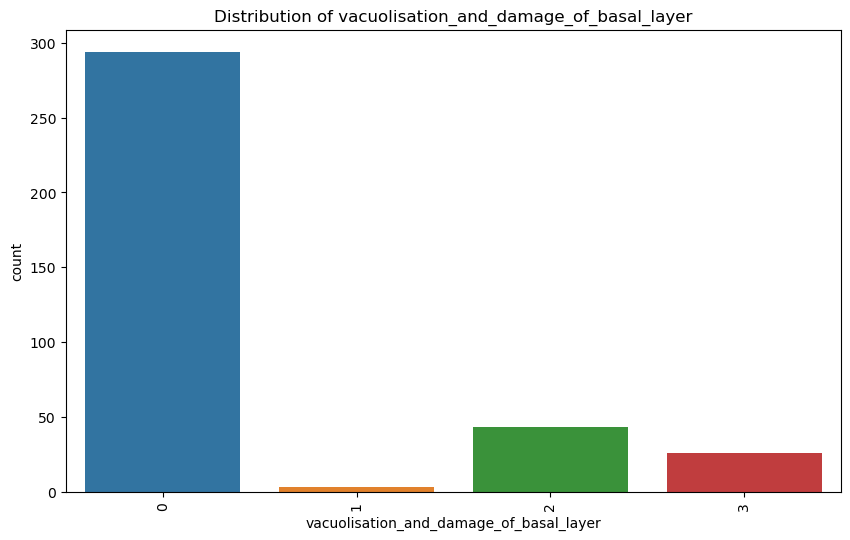

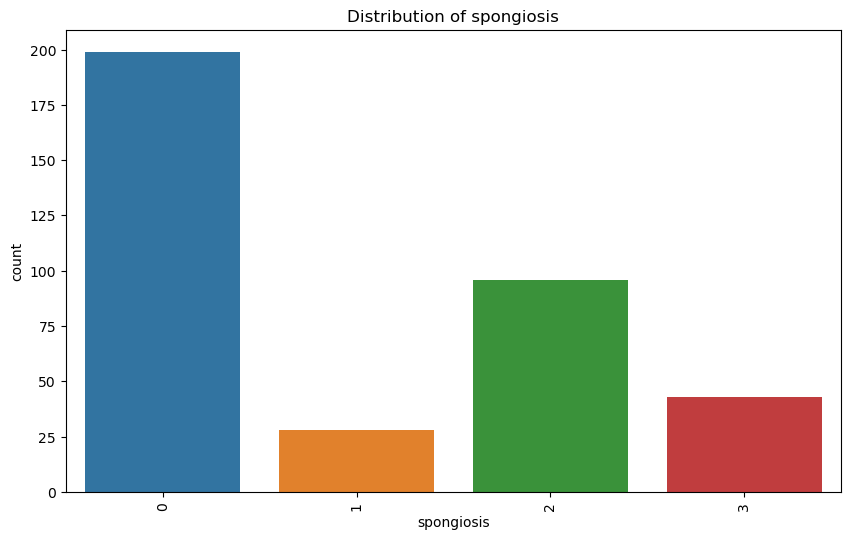

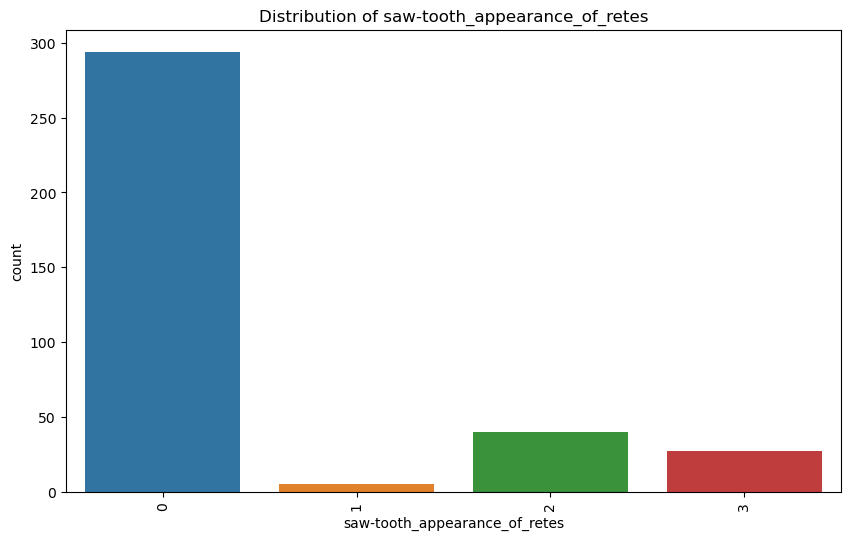

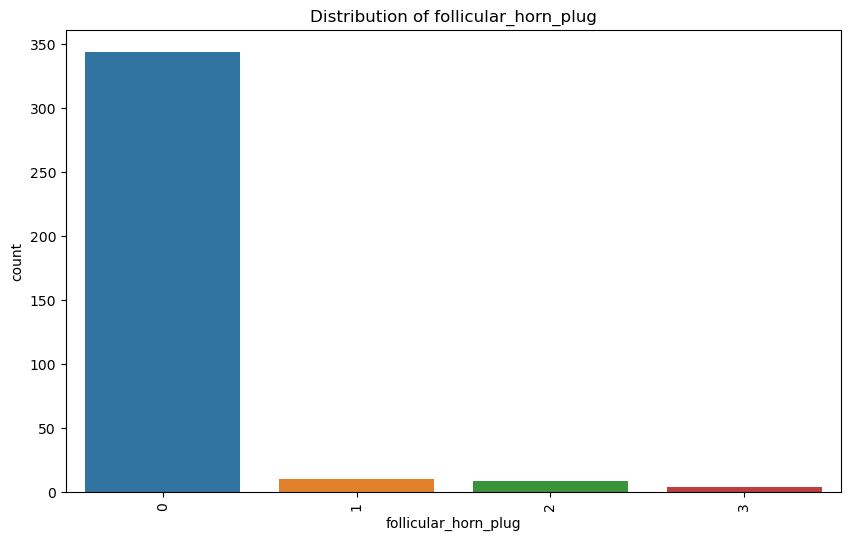

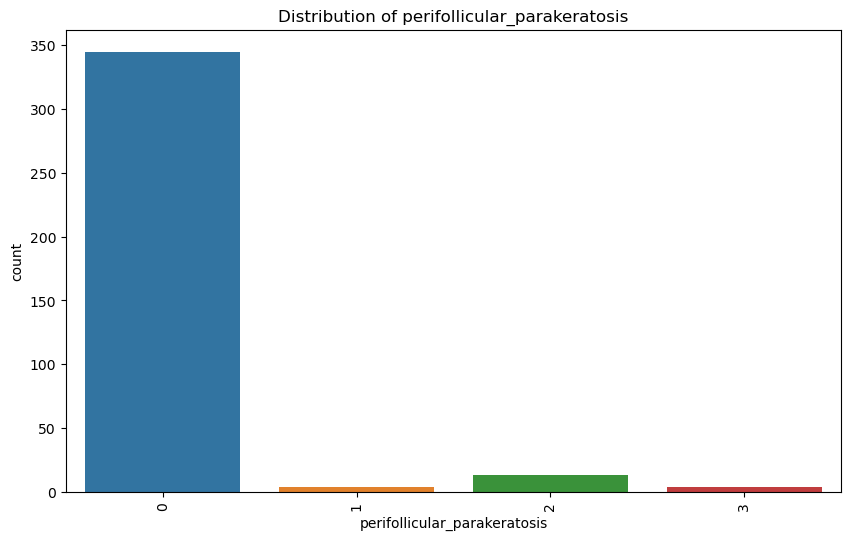

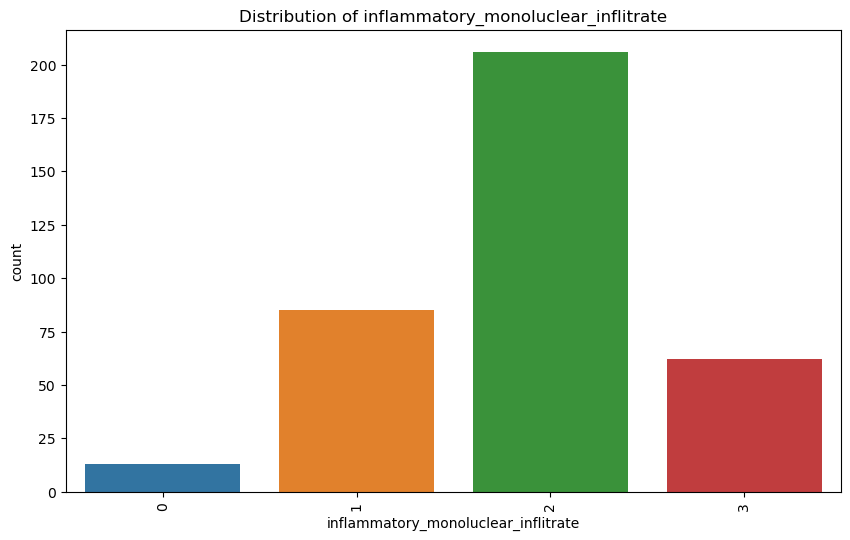

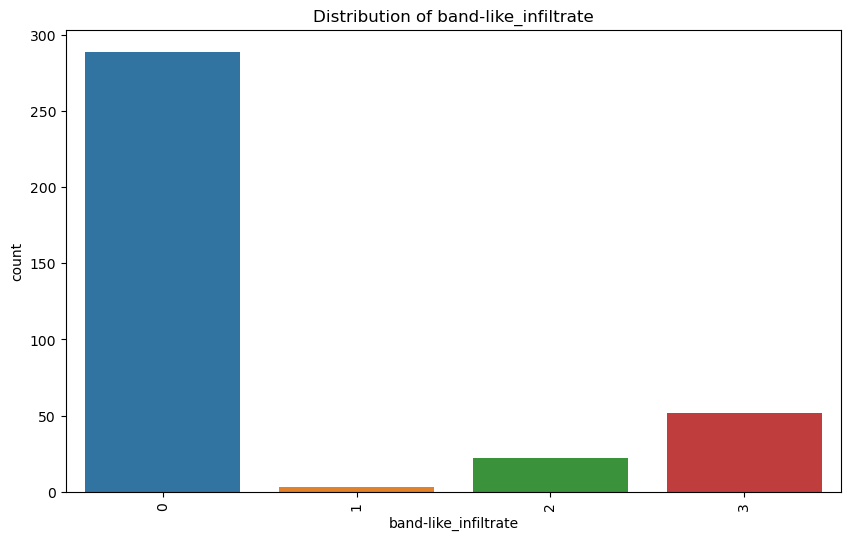

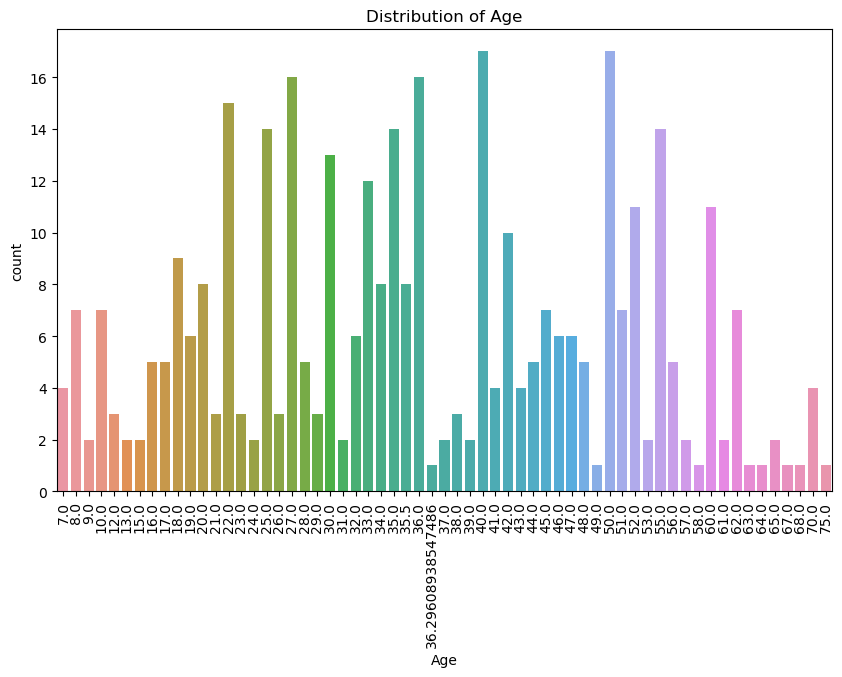

Distribution plots for clinical attributes generated.


In [22]:
# Distribution of clinical attributes
symptom_columns = df.drop(columns = 'class')

# Plotting the distribution of clinical attributes
for column in symptom_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title('Distribution of ' + column)
    plt.xticks(rotation=90)
    plt.show()

print('Distribution plots for clinical attributes generated.')

## Task 2: Predictive Model
Using different machine learning techniques, we will create models that predicts skin disease classes based on the available features. We’ll evaluate each model's performance and select the most effective model and approach.

In [23]:
# import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [24]:
# split data into X and y
X = df.drop(columns = 'class')
y = df['class']

In [25]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# handle imbalanced data
# instantiate oversampling module and fit it into X_train and y_train
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [27]:
# instantiate the models
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42))
]

#### We will begin by determining how our models will perform using an imbalanced data.

In [28]:
# Create the voting classifier on non-resampled data
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the voting classifier to the training data that has not been resampled
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Support Vector Machine', SVC(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))])

In [29]:
# Make predictions on the testing data
y_pred = voting_clf.predict(X_test)

# Evaluate the voting classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

Voting Classifier Accuracy: 0.97


In [30]:
# Determine the best performing base model
best_model1 = None
best_accuracy1 = 0.0
for name, model in models:
    # Fit the base model to the training data that has not been resampled
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred_best1 = model.predict(X_test)
    
    # Evaluate the base model's performance
    base_accuracy1 = accuracy_score(y_test, y_pred_best1)
    print(f"{name} Accuracy: {base_accuracy1:.2f}")
    
    # Update the best performing model
    if base_accuracy1 > best_accuracy1:
        best_model1 = name
        best_accuracy1 = base_accuracy1

print(f"Best Performing Model: {best_model1} (Accuracy: {best_accuracy1:.2f})")

Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99
Support Vector Machine Accuracy: 0.74
KNN Accuracy: 0.84
Logistic Regression Accuracy: 0.97
Best Performing Model: Decision Tree (Accuracy: 0.99)


###### The best model accuracy is from both the decision tree and random forest classifier with accuracy of about 0.99. This is from the data that has not been oversampled yet.

###### Let us determine how these models will perform when the data is oversampled.

In [31]:
# Create the voting classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the voting classifier to the training data into resampled data
voting_clf.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Support Vector Machine', SVC(random_state=42)),
                             ('KNN', KNeighborsClassifier()),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))])

In [32]:
# Make predictions on the testing data
y_pred_over = voting_clf.predict(X_test)

# Evaluate the voting classifier's performance
accuracy = accuracy_score(y_test, y_pred_over)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

Voting Classifier Accuracy: 0.99


###### The voting classifier scores improved a lot after data has been resampled. Therefore we shall proceed with using our resampled data for model building.

In [33]:
# Determine the best performing base model
best_model2 = None
best_accuracy2 = 0.0
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train_over, y_train_over)
    
    # Make predictions on the testing data
    y_pred_best2 = model.predict(X_test)
    
    # Evaluate the each model's performance
    base_accuracy2 = accuracy_score(y_test, y_pred_best2)
    print(f"{name} Accuracy: {base_accuracy2:.2f}")
    
    # Update the best performing model
    if base_accuracy2 > best_accuracy2:
        best_model2 = name
        best_accuracy2 = base_accuracy2

print(f"Best Performing Model: {best_model2} (Accuracy: {best_accuracy2:.2f})")

Decision Tree Accuracy: 0.97
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.81
KNN Accuracy: 0.85
Logistic Regression Accuracy: 0.99
Best Performing Model: Random Forest (Accuracy: 1.00)


###### We can see that Random Forest accuracy score improved to a perfect 1.0, while the Decision Tree score remained the same at about 0.99. Support Vector Machine accuracy also improved to 0.87, KNN accuracy remained the same, while Logistic Regression accuracy improved to the same score as the Decision Tree.

###### We can now go ahead to print the classification report and confusion matrix

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.97        74
weighted avg       0.98      0.97      0.97        74


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

  

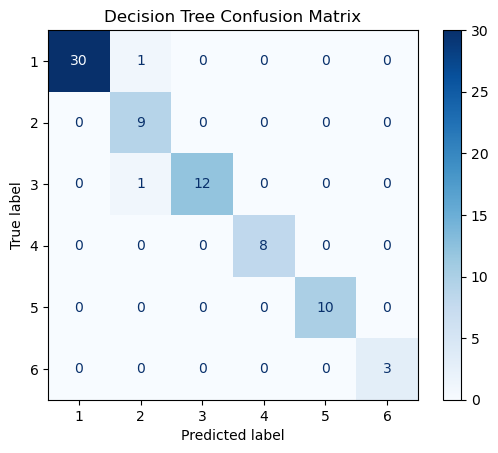

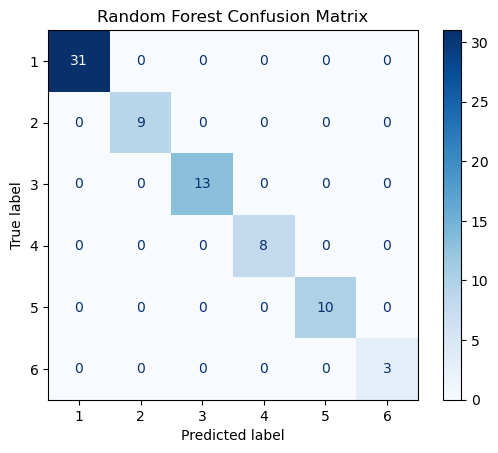

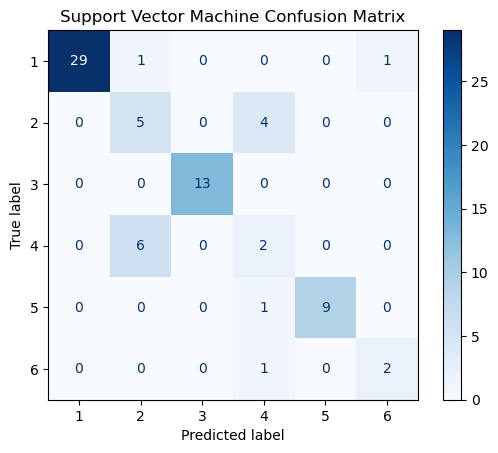

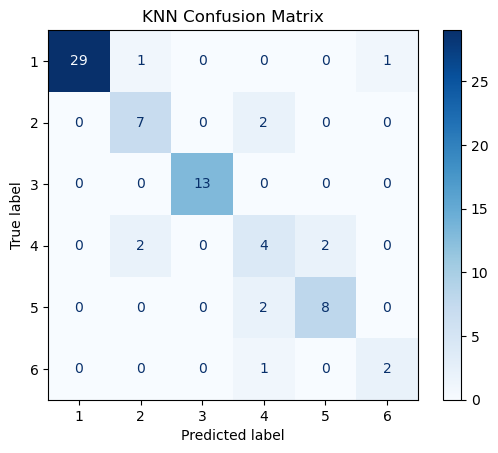

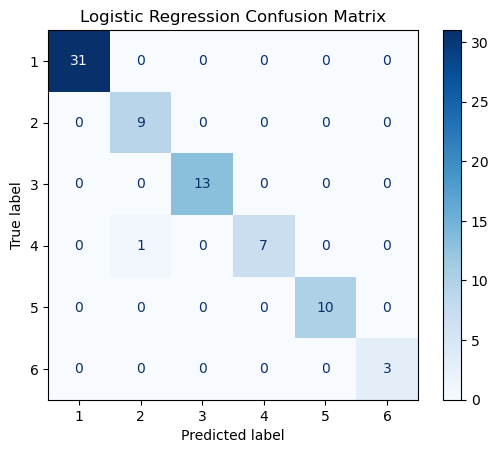

In [34]:
# print classification report and confusion matrix
for name, model in models:
    # Fit the base model to the training data
    model.fit(X_train_over, y_train_over)
    
    # Make predictions on the testing data
    y_pred_best2 = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred_best2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='.0f')
    plt.title(f"{name} Confusion Matrix");
    
    # Generate the classification report
    report = classification_report(y_test, y_pred_best2)
    print(f"{name} Classification Report:\n{report}\n")

###### As much as we have a model that has the perfect score, we suspect that our best model is overfitting because of the 1.0 accuracy score, so we are going to apply cross validation technique to address that. We want to see how each model will perform when given data it has not seen before.

In [36]:
import numpy as np

In [37]:
# Define the number of folds for cross-validation
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Initialize variables to store the best model and its average cross-validation score
best_model3 = None
best_avg_score = 0.0

# Loop over each model to perform k-fold cross-validation
for name, model in models:
    # Perform k-fold cross-validation
    cv_scores = cross_val_score(model, X_train_over, y_train_over, cv=kf)
    
    # Calculate the average cross-validation score for this model
    avg_score = np.mean(cv_scores)
    
    # Print the cross-validation scores and average score for this model
    print(f"{name} Cross Validation Scores: {cv_scores}")
    print(f"{name} Average CV Score: {avg_score:.2f}\n")
    
    # Update the best performing model if it has a higher average score
    if avg_score > best_avg_score:
        best_model3 = model
        best_avg_score = avg_score
    
    # Print the best performing model
print(f"Best Performing Model: {best_model3.__class__.__name__} (Average CV Accuracy: {best_avg_score:.2f})")

Decision Tree Cross Validation Scores: [1.         0.96907216 0.96907216 0.94845361 0.94845361]
Decision Tree Average CV Score: 0.97

Random Forest Cross Validation Scores: [0.98979592 0.97938144 0.97938144 0.96907216 1.        ]
Random Forest Average CV Score: 0.98

Support Vector Machine Cross Validation Scores: [0.91836735 0.88659794 0.86597938 0.78350515 0.8556701 ]
Support Vector Machine Average CV Score: 0.86

KNN Cross Validation Scores: [0.90816327 0.87628866 0.91752577 0.88659794 0.90721649]
KNN Average CV Score: 0.90

Logistic Regression Cross Validation Scores: [0.98979592 1.         1.         0.97938144 0.96907216]
Logistic Regression Average CV Score: 0.99

Best Performing Model: LogisticRegression (Average CV Accuracy: 0.99)


###### Both Random Forest, Decision Tree, and Logistic Regression consistently perform well and will perform well on unseen data, however, the best of the three is the Logistic Regression. SVM and KNN show moderate performance.

###### The Random Forest performance dropped as we suspected because of probably overfitting.

###### Cross-validation has provided a more robust assessment of the model’s generalization ability. By evaluating the model across multiple folds , we get a better estimate of how it will perform on new, unseen data. In our case the Logistic Regression greatly improved to 99% which is the highest score.

In [38]:
# Refit the best model to the entire training data
best_model3.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=1000, random_state=42)

In [39]:
# Calculate accuracy on the training and test set to check for overfitting
accuracy_training = accuracy_score(y_train_over, best_model3.predict(X_train_over))
accuracy_test = accuracy_score(y_test, best_model3.predict(X_test))

print('Training Accuracy: ', accuracy_training)
print('Test Accuracy:', accuracy_test)

Training Accuracy:  1.0
Test Accuracy: 0.9864864864864865


###### Our model did well during training and fell short by just very little points during testing. This test accuracy indicates that our model can generalize very well.


###### Generate a classifiaction report and confusion matrix for our best model

In [40]:
# Generate classification report for the test set
y_pred_test = best_model3.predict(X_test)
print(f"{best_model3.__class__.__name__} Classification Report:")
print(classification_report(y_test, y_pred_test))

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



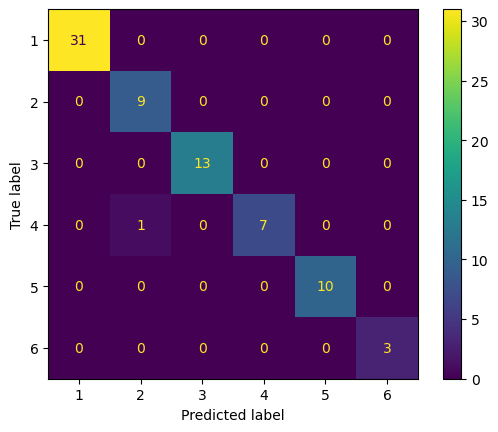

In [41]:
 # Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model3, X_test, y_test);

###### We can see that our model fell short by misclassifying the class 4 disease as a class 2. But generally, our model did very well in perfectly classifying the other classes.

## Challenges Faced

#### The main challenge faced was:
- Small Dataset: With only 366 samples, our dataset was relatively small. This can lead to overfitting, where the model performs well on training data but poorly on unseen data. We used cross-validation technique to address the overfitting challenge.And we saw that our best model performance (Logistic Regression) remained the same at 0.99. Other models like Random Forest decreased significantly after cross validation. 

The Logistic Regression stood the test and we are confident now that our model can generalize to unseen data.

# Task 3:
Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 

In [42]:
# Extract feature importances for Logistic Regression (coefficients)
if isinstance(best_model3, LogisticRegression):
    feature_importances = best_model3.coef_[0]
    feature_names = X_train_over.columns
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)
else:
    print("The best model does not support feature importances extraction.")

                                     Feature  Importance
19               clubbing_of_the_rete_ridges    0.848539
21  thinning_of_the_suprapapillary_epidermis    0.817378
20             elongation_of_the_rete_ridges    0.589655
13                            PNL_infiltrate    0.548249
1                                    scaling    0.414299
22                        spongiform_pustule    0.375954
9                          scalp_involvement    0.356437
23                         munro_microabcess    0.324978
8                 knee_and_elbow_involvement    0.291879
2                           definite_borders    0.288928
25       disappearance_of_the_granular_layer    0.263127
4                         koebner_phenomenon    0.254327
18                             parakeratosis    0.206502
17                            hyperkeratosis    0.159849
0                                   erythema    0.136807
16                                acanthosis    0.116897
10                            f

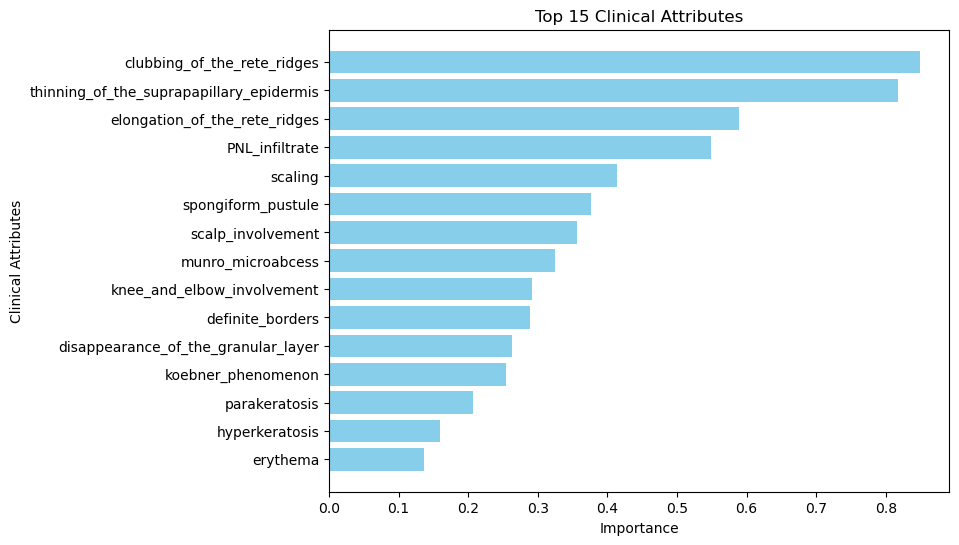

In [44]:
# putting it in a plot

# Select the top 5 features
top_15_features = importance_df.head(15)

# Plot the top 5 features
plt.figure(figsize=(8, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Clinical Attributes')
plt.title('Top 15 Clinical Attributes')
plt.gca().invert_yaxis();


###### - The top 5 clinical attributes influencing the model are clubbing_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, elongation_of_the_rete_ridges, and PNL_infiltrate and scaling.

###### - The features that have positive coefficients indicates that their presence or higher values are associated with a higher likelihood of having a skin disorder.

###### - Conversely, features like spongiosis and exocytosis have negative coefficients, indicating that their presence or higher values are associated with a lower likelihood of having a skin disorder.

###### - Age was not really a significant factor to determine if a patient has a skin disorder.

###### We can go ahead and save our best performing model for production

In [46]:
import pickle
with open('skin_disorder_model', 'wb') as file:
    pickle.dump(best_model3, file)

### General Suggestions for Doctors:

##### 1. Enhanced Diagnostic Accuracy:

They should encourage the use of histopathological examination to confirm clinical diagnoses, especially looking for the top features identified as most important by the model.Using the combination of these key features to improve the accuracy of the diagnosis and reduce the likelihood of misdiagnosis.

##### 2. Targeted Biopsies:

When taking biopsies, they should ensure that the samples are taken from areas where these features are most likely to be present, such as actively scaling lesions or areas with visible changes in the skin's structure.

##### 3. Educational Focus:

Training should be given to dermatologists and pathologists so that they can recognize and understand the significance of these features.
